In [51]:
import pandas as pd
import numpy as np
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

# Training the model for 3-Class Diabetes Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading the processed data from training and testing files

In [3]:
train_data = pd.read_csv("/content/drive/MyDrive/AML_Final_Project/Dataset/train_012.csv")
test_data = pd.read_csv('/content/drive/MyDrive/AML_Final_Project/Dataset/test_012.csv')

In [4]:
train_data.head()

,BMI,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,HighBP_0,HighBP_1,...,Veggies_1,HvyAlcoholConsump_0,HvyAlcoholConsump_1,AnyHealthcare_0,AnyHealthcare_1,NoDocbcCost_0,NoDocbcCost_1,Sex_0,Sex_1,Diabetes_012
0,-0.512552,0.25,0.0,0.000000,0.0,0.750000,0.6,0.428571,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.301115,0.00,0.0,0.000000,0.0,0.000000,0.8,0.571429,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.998837,0.25,0.0,0.000000,0.0,0.833333,0.8,0.285714,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,-0.210274,0.25,0.0,0.166667,0.0,0.166667,0.6,0.714286,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,-0.059135,0.50,0.1,0.000000,0.0,0.666667,0.6,0.428571,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


### Extracting the input and output features from the train and test data

In [5]:
X_train = train_data.drop(['Diabetes_012'], axis=1)
y_train = train_data['Diabetes_012']

In [6]:
X_test = test_data.drop(['Diabetes_012'], axis=1)
y_test = test_data['Diabetes_012']

### Specifying the GridSearch implementation of MLP using 5-fold cross validation

In [ ]:
mlp_classifer = MLPClassifier()
mlp_param_grid ={"hidden_layer_sizes": [(64, 64), (32, 32)],
                "activation": ['relu', 'tanh'],
                "alpha" : [0.01, 0.001],
                 "solver": ['adam'],
                "random_state": [42],
                "verbose" : [True],
                 "max_iter" : [30]}

In [ ]:
mlp_grid_search_clf = GridSearchCV(estimator=mlp_classifer, param_grid=mlp_param_grid, scoring='f1_weighted', cv=5, verbose=3)
mlp_grid_search_clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Iteration 1, loss = 0.41215235
Iteration 2, loss = 0.39778774
Iteration 3, loss = 0.39618769
Iteration 4, loss = 0.39535697
Iteration 5, loss = 0.39487084
Iteration 6, loss = 0.39458187
Iteration 7, loss = 0.39417605
Iteration 8, loss = 0.39393893
Iteration 9, loss = 0.39345163
Iteration 10, loss = 0.39349011
Iteration 11, loss = 0.39322113
Iteration 12, loss = 0.39319440
Iteration 13, loss = 0.39295578
Iteration 14, loss = 0.39285003
Iteration 15, loss = 0.39281676
Iteration 16, loss = 0.39271431
Iteration 17, loss = 0.39250340
Iteration 18, loss = 0.39260475
Iteration 19, loss = 0.39210460
Iteration 20, loss = 0.39197799
Iteration 21, loss = 0.39203662
Iteration 22, loss = 0.39194058
Iteration 23, loss = 0.39170519
Iteration 24, loss = 0.39181925
Iteration 25, loss = 0.39155634
Iteration 26, loss = 0.39148500
Iteration 27, loss = 0.39123007
Iteration 28, loss = 0.39114526
Iteration 29, loss = 0.39106276
Iteration 30, loss = 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.812 total time= 1.5min
Iteration 1, loss = 0.41205717
Iteration 2, loss = 0.39823471
Iteration 3, loss = 0.39660844
Iteration 4, loss = 0.39604176
Iteration 5, loss = 0.39534089
Iteration 6, loss = 0.39527680
Iteration 7, loss = 0.39470138
Iteration 8, loss = 0.39441273
Iteration 9, loss = 0.39419875
Iteration 10, loss = 0.39426784
Iteration 11, loss = 0.39379994
Iteration 12, loss = 0.39391016
Iteration 13, loss = 0.39351592
Iteration 14, loss = 0.39327839
Iteration 15, loss = 0.39336567
Iteration 16, loss = 0.39328792
Iteration 17, loss = 0.39294381
Iteration 18, loss = 0.39310923
Iteration 19, loss = 0.39272656
Iteration 20, loss = 0.39265270
Iteration 21, loss = 0.39260766
Iteration 22, loss = 0.39252217
Iteration 23, loss = 0.39236982
Iteration 24, loss = 0.39227241
Iteration 25, loss = 0.39220599
Iteration 26, loss = 0.39201036
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.817 total time= 1.4min
Iteration 1, loss = 0.41252851
Iteration 2, loss = 0.39817426
Iteration 3, loss = 0.39670241
Iteration 4, loss = 0.39597669
Iteration 5, loss = 0.39547193
Iteration 6, loss = 0.39522500
Iteration 7, loss = 0.39458329
Iteration 8, loss = 0.39433887
Iteration 9, loss = 0.39410630
Iteration 10, loss = 0.39388652
Iteration 11, loss = 0.39358317
Iteration 12, loss = 0.39364331
Iteration 13, loss = 0.39325861
Iteration 14, loss = 0.39322042
Iteration 15, loss = 0.39306447
Iteration 16, loss = 0.39307784
Iteration 17, loss = 0.39278114
Iteration 18, loss = 0.39288127
Iteration 19, loss = 0.39244086
Iteration 20, loss = 0.39224091
Iteration 21, loss = 0.39237155
Iteration 22, loss = 0.39216209
Iteration 23, loss = 0.39190210
Iteration 24, loss = 0.39197293
Iteration 25, loss = 0.39197364
Iteration 26, loss = 0.39181115
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.816 total time= 1.5min
Iteration 1, loss = 0.41267216
Iteration 2, loss = 0.39839539
Iteration 3, loss = 0.39741309
Iteration 4, loss = 0.39642334
Iteration 5, loss = 0.39586462
Iteration 6, loss = 0.39551491
Iteration 7, loss = 0.39501951
Iteration 8, loss = 0.39478195
Iteration 9, loss = 0.39463781
Iteration 10, loss = 0.39411372
Iteration 11, loss = 0.39389630
Iteration 12, loss = 0.39373905
Iteration 13, loss = 0.39346872
Iteration 14, loss = 0.39372553
Iteration 15, loss = 0.39347499
Iteration 16, loss = 0.39339824
Iteration 17, loss = 0.39301104
Iteration 18, loss = 0.39326266
Iteration 19, loss = 0.39288328
Iteration 20, loss = 0.39287852
Iteration 21, loss = 0.39273590
Iteration 22, loss = 0.39270717
Iteration 23, loss = 0.39251249
Iteration 24, loss = 0.39254478
Iteration 25, loss = 0.39249917
Iteration 26, loss = 0.39248662
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.812 total time= 1.5min
Iteration 1, loss = 0.41240806
Iteration 2, loss = 0.39805465
Iteration 3, loss = 0.39693051
Iteration 4, loss = 0.39624233
Iteration 5, loss = 0.39557903
Iteration 6, loss = 0.39478741
Iteration 7, loss = 0.39498353
Iteration 8, loss = 0.39421234
Iteration 9, loss = 0.39443073
Iteration 10, loss = 0.39370157
Iteration 11, loss = 0.39351185
Iteration 12, loss = 0.39344205
Iteration 13, loss = 0.39325192
Iteration 14, loss = 0.39294189
Iteration 15, loss = 0.39304267
Iteration 16, loss = 0.39293459
Iteration 17, loss = 0.39261496
Iteration 18, loss = 0.39265504
Iteration 19, loss = 0.39258993
Iteration 20, loss = 0.39233244
Iteration 21, loss = 0.39216180
Iteration 22, loss = 0.39215198
Iteration 23, loss = 0.39212569
Iteration 24, loss = 0.39176085
Iteration 25, loss = 0.39184032
Iteration 26, loss = 0.39193700
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.810 total time= 1.5min
Iteration 1, loss = 0.42157668
Iteration 2, loss = 0.39816506
Iteration 3, loss = 0.39649305
Iteration 4, loss = 0.39538959
Iteration 5, loss = 0.39520459
Iteration 6, loss = 0.39453142
Iteration 7, loss = 0.39429347
Iteration 8, loss = 0.39407722
Iteration 9, loss = 0.39379961
Iteration 10, loss = 0.39382632
Iteration 11, loss = 0.39342140
Iteration 12, loss = 0.39335638
Iteration 13, loss = 0.39316322
Iteration 14, loss = 0.39310465
Iteration 15, loss = 0.39319850
Iteration 16, loss = 0.39283035
Iteration 17, loss = 0.39278184
Iteration 18, loss = 0.39270822
Iteration 19, loss = 0.39246352
Iteration 20, loss = 0.39227624
Iteration 21, loss = 0.39259179
Iteration 22, loss = 0.39253332
Iteration 23, loss = 0.39228110
Iteration 24, loss = 0.39222552
Iteration 25, loss = 0.39226525
Iteration 26, loss = 0.39219665
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.42133342
Iteration 2, loss = 0.39831229
Iteration 3, loss = 0.39660248
Iteration 4, loss = 0.39567796
Iteration 5, loss = 0.39555980
Iteration 6, loss = 0.39482532
Iteration 7, loss = 0.39473366
Iteration 8, loss = 0.39432047
Iteration 9, loss = 0.39421608
Iteration 10, loss = 0.39436478
Iteration 11, loss = 0.39394294
Iteration 12, loss = 0.39380078
Iteration 13, loss = 0.39355556
Iteration 14, loss = 0.39361885
Iteration 15, loss = 0.39363949
Iteration 16, loss = 0.39342767
Iteration 17, loss = 0.39322646
Iteration 18, loss = 0.39323831
Iteration 19, loss = 0.39300161
Iteration 20, loss = 0.39296120
Iteration 21, loss = 0.39327766
Iteration 22, loss = 0.39307174
Iteration 23, loss = 0.39288692
Iteration 24, loss = 0.39288451
Iteration 25, loss = 0.39290515
Iteration 26, loss = 0.39277494
Iteration 27, loss = 0.39271277
Iteration 28, loss = 0.39263076
Iteration 29, loss = 0.39247931
Iteration 30, loss = 0.39258242
[CV 2/5] END activation=relu, alpha=0.01, hidden_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.42157173
Iteration 2, loss = 0.39827025
Iteration 3, loss = 0.39647900
Iteration 4, loss = 0.39575095
Iteration 5, loss = 0.39530361
Iteration 6, loss = 0.39490621
Iteration 7, loss = 0.39455685
Iteration 8, loss = 0.39423634
Iteration 9, loss = 0.39420943
Iteration 10, loss = 0.39402253
Iteration 11, loss = 0.39388901
Iteration 12, loss = 0.39382459
Iteration 13, loss = 0.39352579
Iteration 14, loss = 0.39364868
Iteration 15, loss = 0.39334444
Iteration 16, loss = 0.39340879
Iteration 17, loss = 0.39301094
Iteration 18, loss = 0.39311841
Iteration 19, loss = 0.39314282
Iteration 20, loss = 0.39291979
Iteration 21, loss = 0.39318863
Iteration 22, loss = 0.39290586
Iteration 23, loss = 0.39266116
Iteration 24, loss = 0.39275905
Iteration 25, loss = 0.39256231
Iteration 26, loss = 0.39282681
Iteration 27, loss = 0.39275346
Iteration 28, loss = 0.39253851
Iteration 29, loss = 0.39245163
Iteration 30, loss = 0.39238601
[CV 3/5] END activation=relu, alpha=0.01, hidden_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.42193471
Iteration 2, loss = 0.39847610
Iteration 3, loss = 0.39702168
Iteration 4, loss = 0.39623367
Iteration 5, loss = 0.39576998
Iteration 6, loss = 0.39535862
Iteration 7, loss = 0.39486739
Iteration 8, loss = 0.39452884
Iteration 9, loss = 0.39447191
Iteration 10, loss = 0.39436139
Iteration 11, loss = 0.39419995
Iteration 12, loss = 0.39414556
Iteration 13, loss = 0.39377131
Iteration 14, loss = 0.39390115
Iteration 15, loss = 0.39365560
Iteration 16, loss = 0.39349808
Iteration 17, loss = 0.39344028
Iteration 18, loss = 0.39355864
Iteration 19, loss = 0.39342924
Iteration 20, loss = 0.39340945
Iteration 21, loss = 0.39342799
Iteration 22, loss = 0.39316157
Iteration 23, loss = 0.39291005
Iteration 24, loss = 0.39305147
Iteration 25, loss = 0.39307076
Iteration 26, loss = 0.39314852
Iteration 27, loss = 0.39297165
Iteration 28, loss = 0.39278399
Iteration 29, loss = 0.39282062
Iteration 30, loss = 0.39256988
[CV 4/5] END activation=relu, alpha=0.01, hidden_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.42101610
Iteration 2, loss = 0.39873191
Iteration 3, loss = 0.39703132
Iteration 4, loss = 0.39627828
Iteration 5, loss = 0.39550149
Iteration 6, loss = 0.39526972
Iteration 7, loss = 0.39483898
Iteration 8, loss = 0.39449751
Iteration 9, loss = 0.39433320
Iteration 10, loss = 0.39419144
Iteration 11, loss = 0.39402516
Iteration 12, loss = 0.39386545
Iteration 13, loss = 0.39389949
Iteration 14, loss = 0.39364384
Iteration 15, loss = 0.39342469
Iteration 16, loss = 0.39337087
Iteration 17, loss = 0.39335658
Iteration 18, loss = 0.39321120
Iteration 19, loss = 0.39304794
Iteration 20, loss = 0.39315771
Iteration 21, loss = 0.39296076
Iteration 22, loss = 0.39276718
Iteration 23, loss = 0.39271984
Iteration 24, loss = 0.39279065
Iteration 25, loss = 0.39286350
Iteration 26, loss = 0.39245929
Iteration 27, loss = 0.39245031
Iteration 28, loss = 0.39248441
Iteration 29, loss = 0.39233855
Iteration 30, loss = 0.39233816


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(32, 32), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.807 total time=  36.1s
Iteration 1, loss = 0.40975776
Iteration 2, loss = 0.39563555
Iteration 3, loss = 0.39417381
Iteration 4, loss = 0.39347747
Iteration 5, loss = 0.39308374
Iteration 6, loss = 0.39278484
Iteration 7, loss = 0.39241613
Iteration 8, loss = 0.39221013
Iteration 9, loss = 0.39169883
Iteration 10, loss = 0.39164282
Iteration 11, loss = 0.39127062
Iteration 12, loss = 0.39108424
Iteration 13, loss = 0.39086657
Iteration 14, loss = 0.39057868
Iteration 15, loss = 0.39043715
Iteration 16, loss = 0.39027227
Iteration 17, loss = 0.38992760
Iteration 18, loss = 0.38990974
Iteration 19, loss = 0.38927702
Iteration 20, loss = 0.38907609
Iteration 21, loss = 0.38897041
Iteration 22, loss = 0.38875669
Iteration 23, loss = 0.38845182
Iteration 24, loss = 0.38827287
Iteration 25, loss = 0.38793466
Iteration 26, loss = 0.38764473
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.812 total time= 1.4min
Iteration 1, loss = 0.40967098
Iteration 2, loss = 0.39618311
Iteration 3, loss = 0.39466196
Iteration 4, loss = 0.39419834
Iteration 5, loss = 0.39354292
Iteration 6, loss = 0.39349984
Iteration 7, loss = 0.39294238
Iteration 8, loss = 0.39262408
Iteration 9, loss = 0.39242656
Iteration 10, loss = 0.39238220
Iteration 11, loss = 0.39181076
Iteration 12, loss = 0.39186784
Iteration 13, loss = 0.39147341
Iteration 14, loss = 0.39102675
Iteration 15, loss = 0.39105767
Iteration 16, loss = 0.39085580
Iteration 17, loss = 0.39042199
Iteration 18, loss = 0.39047546
Iteration 19, loss = 0.39003591
Iteration 20, loss = 0.38986398
Iteration 21, loss = 0.38965066
Iteration 22, loss = 0.38928802
Iteration 23, loss = 0.38903210
Iteration 24, loss = 0.38884413
Iteration 25, loss = 0.38866638
Iteration 26, loss = 0.38838459
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.41020761
Iteration 2, loss = 0.39616465
Iteration 3, loss = 0.39473347
Iteration 4, loss = 0.39413401
Iteration 5, loss = 0.39357110
Iteration 6, loss = 0.39344033
Iteration 7, loss = 0.39273106
Iteration 8, loss = 0.39246572
Iteration 9, loss = 0.39226881
Iteration 10, loss = 0.39200183
Iteration 11, loss = 0.39164338
Iteration 12, loss = 0.39163952
Iteration 13, loss = 0.39113731
Iteration 14, loss = 0.39096623
Iteration 15, loss = 0.39074208
Iteration 16, loss = 0.39059461
Iteration 17, loss = 0.39028231
Iteration 18, loss = 0.39021304
Iteration 19, loss = 0.38957728
Iteration 20, loss = 0.38937526
Iteration 21, loss = 0.38933097
Iteration 22, loss = 0.38896426
Iteration 23, loss = 0.38849224
Iteration 24, loss = 0.38846031
Iteration 25, loss = 0.38822688
Iteration 26, loss = 0.38795526
Iteration 27, loss = 0.38785221
Iteration 28, loss = 0.38729664
Iteration 29, loss = 0.38725502
Iteration 30, loss = 0.38701225


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.815 total time= 1.3min
Iteration 1, loss = 0.41026949
Iteration 2, loss = 0.39627789
Iteration 3, loss = 0.39550755
Iteration 4, loss = 0.39454500
Iteration 5, loss = 0.39403564
Iteration 6, loss = 0.39370189
Iteration 7, loss = 0.39316632
Iteration 8, loss = 0.39288865
Iteration 9, loss = 0.39273659
Iteration 10, loss = 0.39209759
Iteration 11, loss = 0.39186153
Iteration 12, loss = 0.39166638
Iteration 13, loss = 0.39122814
Iteration 14, loss = 0.39142058
Iteration 15, loss = 0.39103722
Iteration 16, loss = 0.39087118
Iteration 17, loss = 0.39036342
Iteration 18, loss = 0.39043035
Iteration 19, loss = 0.38983547
Iteration 20, loss = 0.38971484
Iteration 21, loss = 0.38940489
Iteration 22, loss = 0.38919625
Iteration 23, loss = 0.38871622
Iteration 24, loss = 0.38867485
Iteration 25, loss = 0.38835435
Iteration 26, loss = 0.38815241
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.41003082
Iteration 2, loss = 0.39604110
Iteration 3, loss = 0.39508625
Iteration 4, loss = 0.39450091
Iteration 5, loss = 0.39386695
Iteration 6, loss = 0.39312558
Iteration 7, loss = 0.39320008
Iteration 8, loss = 0.39244856
Iteration 9, loss = 0.39252904
Iteration 10, loss = 0.39167328
Iteration 11, loss = 0.39153066
Iteration 12, loss = 0.39127030
Iteration 13, loss = 0.39095161
Iteration 14, loss = 0.39046390
Iteration 15, loss = 0.39055691
Iteration 16, loss = 0.39013215
Iteration 17, loss = 0.38987905
Iteration 18, loss = 0.38974163
Iteration 19, loss = 0.38959241
Iteration 20, loss = 0.38900715
Iteration 21, loss = 0.38880980
Iteration 22, loss = 0.38857057
Iteration 23, loss = 0.38846818
Iteration 24, loss = 0.38797013
Iteration 25, loss = 0.38793414
Iteration 26, loss = 0.38774713
Iteration 27, loss = 0.38761534
Iteration 28, loss = 0.38718633
Iteration 29, loss = 0.38703233
Iteration 30, loss = 0.38656375


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.810 total time= 1.4min
Iteration 1, loss = 0.42007843
Iteration 2, loss = 0.39673511
Iteration 3, loss = 0.39512400
Iteration 4, loss = 0.39408945
Iteration 5, loss = 0.39391409
Iteration 6, loss = 0.39317668
Iteration 7, loss = 0.39291447
Iteration 8, loss = 0.39272992
Iteration 9, loss = 0.39242027
Iteration 10, loss = 0.39238886
Iteration 11, loss = 0.39196287
Iteration 12, loss = 0.39187497
Iteration 13, loss = 0.39169805
Iteration 14, loss = 0.39158519
Iteration 15, loss = 0.39162077
Iteration 16, loss = 0.39118666
Iteration 17, loss = 0.39127269
Iteration 18, loss = 0.39108734
Iteration 19, loss = 0.39088743
Iteration 20, loss = 0.39059839
Iteration 21, loss = 0.39094968
Iteration 22, loss = 0.39084915
Iteration 23, loss = 0.39049596
Iteration 24, loss = 0.39047819
Iteration 25, loss = 0.39043252
Iteration 26, loss = 0.39035140
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.41982139
Iteration 2, loss = 0.39692294
Iteration 3, loss = 0.39526648
Iteration 4, loss = 0.39430716
Iteration 5, loss = 0.39427634
Iteration 6, loss = 0.39352757
Iteration 7, loss = 0.39334352
Iteration 8, loss = 0.39296876
Iteration 9, loss = 0.39280016
Iteration 10, loss = 0.39288073
Iteration 11, loss = 0.39241078
Iteration 12, loss = 0.39225236
Iteration 13, loss = 0.39200554
Iteration 14, loss = 0.39207903
Iteration 15, loss = 0.39201254
Iteration 16, loss = 0.39172122
Iteration 17, loss = 0.39161788
Iteration 18, loss = 0.39151952
Iteration 19, loss = 0.39127833
Iteration 20, loss = 0.39114516
Iteration 21, loss = 0.39140140
Iteration 22, loss = 0.39114046
Iteration 23, loss = 0.39093967
Iteration 24, loss = 0.39094168
Iteration 25, loss = 0.39096006
Iteration 26, loss = 0.39079779
Iteration 27, loss = 0.39071343
Iteration 28, loss = 0.39059935
Iteration 29, loss = 0.39037859
Iteration 30, loss = 0.39050065
[CV 2/5] END activation=relu, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.42010214
Iteration 2, loss = 0.39689836
Iteration 3, loss = 0.39520142
Iteration 4, loss = 0.39443200
Iteration 5, loss = 0.39407604
Iteration 6, loss = 0.39364211
Iteration 7, loss = 0.39331952
Iteration 8, loss = 0.39305761
Iteration 9, loss = 0.39295979
Iteration 10, loss = 0.39277935
Iteration 11, loss = 0.39253788
Iteration 12, loss = 0.39244266
Iteration 13, loss = 0.39209669
Iteration 14, loss = 0.39214955
Iteration 15, loss = 0.39186542
Iteration 16, loss = 0.39185003
Iteration 17, loss = 0.39145607
Iteration 18, loss = 0.39141746
Iteration 19, loss = 0.39142379
Iteration 20, loss = 0.39118194
Iteration 21, loss = 0.39141409
Iteration 22, loss = 0.39113638
Iteration 23, loss = 0.39085976
Iteration 24, loss = 0.39098818
Iteration 25, loss = 0.39073568
Iteration 26, loss = 0.39090048
Iteration 27, loss = 0.39078179
Iteration 28, loss = 0.39049771
Iteration 29, loss = 0.39040962
Iteration 30, loss = 0.39022158
[CV 3/5] END activation=relu, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.42048741
Iteration 2, loss = 0.39711614
Iteration 3, loss = 0.39559824
Iteration 4, loss = 0.39481560
Iteration 5, loss = 0.39436528
Iteration 6, loss = 0.39398030
Iteration 7, loss = 0.39349259
Iteration 8, loss = 0.39311814
Iteration 9, loss = 0.39301365
Iteration 10, loss = 0.39289506
Iteration 11, loss = 0.39264808
Iteration 12, loss = 0.39259838
Iteration 13, loss = 0.39223945
Iteration 14, loss = 0.39225031
Iteration 15, loss = 0.39198230
Iteration 16, loss = 0.39184985
Iteration 17, loss = 0.39173316
Iteration 18, loss = 0.39175557
Iteration 19, loss = 0.39158839
Iteration 20, loss = 0.39153195
Iteration 21, loss = 0.39155794
Iteration 22, loss = 0.39125220
Iteration 23, loss = 0.39098292
Iteration 24, loss = 0.39108401
Iteration 25, loss = 0.39095352
Iteration 26, loss = 0.39107391
Iteration 27, loss = 0.39078849
Iteration 28, loss = 0.39065078
Iteration 29, loss = 0.39064536
Iteration 30, loss = 0.39035935
[CV 4/5] END activation=relu, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.41955201
Iteration 2, loss = 0.39739242
Iteration 3, loss = 0.39565266
Iteration 4, loss = 0.39494313
Iteration 5, loss = 0.39419321
Iteration 6, loss = 0.39394483
Iteration 7, loss = 0.39358534
Iteration 8, loss = 0.39330970
Iteration 9, loss = 0.39305603
Iteration 10, loss = 0.39294784
Iteration 11, loss = 0.39271222
Iteration 12, loss = 0.39257281
Iteration 13, loss = 0.39254224
Iteration 14, loss = 0.39231247
Iteration 15, loss = 0.39204717
Iteration 16, loss = 0.39197775
Iteration 17, loss = 0.39182562
Iteration 18, loss = 0.39170463
Iteration 19, loss = 0.39153587
Iteration 20, loss = 0.39163899
Iteration 21, loss = 0.39138820
Iteration 22, loss = 0.39123671
Iteration 23, loss = 0.39122037
Iteration 24, loss = 0.39125647
Iteration 25, loss = 0.39123896
Iteration 26, loss = 0.39082597
Iteration 27, loss = 0.39076613
Iteration 28, loss = 0.39072567
Iteration 29, loss = 0.39054837
Iteration 30, loss = 0.39052966
[CV 5/5] END activation=relu, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.41235564
Iteration 2, loss = 0.40029054
Iteration 3, loss = 0.39825124
Iteration 4, loss = 0.39740347
Iteration 5, loss = 0.39682445
Iteration 6, loss = 0.39656099
Iteration 7, loss = 0.39611495
Iteration 8, loss = 0.39587042
Iteration 9, loss = 0.39545403
Iteration 10, loss = 0.39540949
Iteration 11, loss = 0.39516971
Iteration 12, loss = 0.39509047
Iteration 13, loss = 0.39496723
Iteration 14, loss = 0.39481755
Iteration 15, loss = 0.39474822
Iteration 16, loss = 0.39470281
Iteration 17, loss = 0.39448929
Iteration 18, loss = 0.39471836
Iteration 19, loss = 0.39405725
Iteration 20, loss = 0.39408203
Iteration 21, loss = 0.39410285
Iteration 22, loss = 0.39410265
Iteration 23, loss = 0.39408204
Iteration 24, loss = 0.39407417
Iteration 25, loss = 0.39395348
Iteration 26, loss = 0.39377408
Iteration 27, loss = 0.39370041
Iteration 28, loss = 0.39350468
Iteration 29, loss = 0.39354548
Iteration 30, loss = 0.39373943


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.809 total time= 2.2min
Iteration 1, loss = 0.41259078
Iteration 2, loss = 0.40086320
Iteration 3, loss = 0.39866104
Iteration 4, loss = 0.39784904
Iteration 5, loss = 0.39720327
Iteration 6, loss = 0.39715832
Iteration 7, loss = 0.39648999
Iteration 8, loss = 0.39622804
Iteration 9, loss = 0.39602549
Iteration 10, loss = 0.39612957
Iteration 11, loss = 0.39566428
Iteration 12, loss = 0.39578220
Iteration 13, loss = 0.39552075
Iteration 14, loss = 0.39510302
Iteration 15, loss = 0.39537456
Iteration 16, loss = 0.39514788
Iteration 17, loss = 0.39491759
Iteration 18, loss = 0.39506306
Iteration 19, loss = 0.39472170
Iteration 20, loss = 0.39461162
Iteration 21, loss = 0.39473232
Iteration 22, loss = 0.39466706
Iteration 23, loss = 0.39444506
Iteration 24, loss = 0.39444649
Iteration 25, loss = 0.39463114
Iteration 26, loss = 0.39420670
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.813 total time= 2.1min
Iteration 1, loss = 0.41311561
Iteration 2, loss = 0.40079994
Iteration 3, loss = 0.39882742
Iteration 4, loss = 0.39783642
Iteration 5, loss = 0.39719492
Iteration 6, loss = 0.39716361
Iteration 7, loss = 0.39637509
Iteration 8, loss = 0.39612156
Iteration 9, loss = 0.39599085
Iteration 10, loss = 0.39571399
Iteration 11, loss = 0.39557348
Iteration 12, loss = 0.39551859
Iteration 13, loss = 0.39522498
Iteration 14, loss = 0.39516811
Iteration 15, loss = 0.39516522
Iteration 16, loss = 0.39508496
Iteration 17, loss = 0.39485301
Iteration 18, loss = 0.39498861
Iteration 19, loss = 0.39453133
Iteration 20, loss = 0.39446645
Iteration 21, loss = 0.39453392
Iteration 22, loss = 0.39451510
Iteration 23, loss = 0.39412821
Iteration 24, loss = 0.39434118
Iteration 25, loss = 0.39443224
Iteration 26, loss = 0.39426347
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.814 total time= 2.2min
Iteration 1, loss = 0.41340309
Iteration 2, loss = 0.40078950
Iteration 3, loss = 0.39943883
Iteration 4, loss = 0.39830466
Iteration 5, loss = 0.39760588
Iteration 6, loss = 0.39736651
Iteration 7, loss = 0.39694046
Iteration 8, loss = 0.39669637
Iteration 9, loss = 0.39656677
Iteration 10, loss = 0.39613542
Iteration 11, loss = 0.39588595
Iteration 12, loss = 0.39578006
Iteration 13, loss = 0.39558428
Iteration 14, loss = 0.39580524
Iteration 15, loss = 0.39552717
Iteration 16, loss = 0.39546453
Iteration 17, loss = 0.39515366
Iteration 18, loss = 0.39534401
Iteration 19, loss = 0.39497866
Iteration 20, loss = 0.39483575
Iteration 21, loss = 0.39482612
Iteration 22, loss = 0.39478176
Iteration 23, loss = 0.39455422
Iteration 24, loss = 0.39466038
Iteration 25, loss = 0.39469568
Iteration 26, loss = 0.39454433
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.809 total time= 2.1min
Iteration 1, loss = 0.41341949
Iteration 2, loss = 0.40058042
Iteration 3, loss = 0.39929787
Iteration 4, loss = 0.39816382
Iteration 5, loss = 0.39755942
Iteration 6, loss = 0.39687137
Iteration 7, loss = 0.39702784
Iteration 8, loss = 0.39634180
Iteration 9, loss = 0.39648844
Iteration 10, loss = 0.39572208
Iteration 11, loss = 0.39562350
Iteration 12, loss = 0.39551418
Iteration 13, loss = 0.39539319
Iteration 14, loss = 0.39501127
Iteration 15, loss = 0.39528302
Iteration 16, loss = 0.39524273
Iteration 17, loss = 0.39497307
Iteration 18, loss = 0.39482678
Iteration 19, loss = 0.39479637
Iteration 20, loss = 0.39456133
Iteration 21, loss = 0.39438076
Iteration 22, loss = 0.39447748
Iteration 23, loss = 0.39444688
Iteration 24, loss = 0.39419573
Iteration 25, loss = 0.39422327
Iteration 26, loss = 0.39429517
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.805 total time= 2.1min
Iteration 1, loss = 0.42076553
Iteration 2, loss = 0.39882559
Iteration 3, loss = 0.39739276
Iteration 4, loss = 0.39652953
Iteration 5, loss = 0.39626891
Iteration 6, loss = 0.39549947
Iteration 7, loss = 0.39523366
Iteration 8, loss = 0.39509871
Iteration 9, loss = 0.39490614
Iteration 10, loss = 0.39471314
Iteration 11, loss = 0.39442160
Iteration 12, loss = 0.39432755
Iteration 13, loss = 0.39428606
Iteration 14, loss = 0.39409733
Iteration 15, loss = 0.39437505
Iteration 16, loss = 0.39382949
Iteration 17, loss = 0.39391828
Iteration 18, loss = 0.39386319
Iteration 19, loss = 0.39356512
Iteration 20, loss = 0.39337169
Iteration 21, loss = 0.39369837
Iteration 22, loss = 0.39364255
Iteration 23, loss = 0.39327896
Iteration 24, loss = 0.39326749
Iteration 25, loss = 0.39324445
Iteration 26, loss = 0.39324768
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.817 total time=  49.2s
Iteration 1, loss = 0.42066431
Iteration 2, loss = 0.39904348
Iteration 3, loss = 0.39765828
Iteration 4, loss = 0.39689968
Iteration 5, loss = 0.39673926
Iteration 6, loss = 0.39594373
Iteration 7, loss = 0.39584019
Iteration 8, loss = 0.39548967
Iteration 9, loss = 0.39527100
Iteration 10, loss = 0.39538708
Iteration 11, loss = 0.39506814
Iteration 12, loss = 0.39487719
Iteration 13, loss = 0.39464904
Iteration 14, loss = 0.39471928
Iteration 15, loss = 0.39475111
Iteration 16, loss = 0.39441333
Iteration 17, loss = 0.39440223
Iteration 18, loss = 0.39434808
Iteration 19, loss = 0.39406421
Iteration 20, loss = 0.39398709
Iteration 21, loss = 0.39430029
Iteration 22, loss = 0.39404571
Iteration 23, loss = 0.39389168
Iteration 24, loss = 0.39392808
Iteration 25, loss = 0.39408571
Iteration 26, loss = 0.39383837
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.812 total time=  50.6s
Iteration 1, loss = 0.42108586
Iteration 2, loss = 0.39904774
Iteration 3, loss = 0.39764127
Iteration 4, loss = 0.39701488
Iteration 5, loss = 0.39655655
Iteration 6, loss = 0.39614147
Iteration 7, loss = 0.39582343
Iteration 8, loss = 0.39542667
Iteration 9, loss = 0.39535007
Iteration 10, loss = 0.39509531
Iteration 11, loss = 0.39509337
Iteration 12, loss = 0.39497190
Iteration 13, loss = 0.39469131
Iteration 14, loss = 0.39481702
Iteration 15, loss = 0.39449839
Iteration 16, loss = 0.39448850
Iteration 17, loss = 0.39417380
Iteration 18, loss = 0.39426563
Iteration 19, loss = 0.39426835
Iteration 20, loss = 0.39396957
Iteration 21, loss = 0.39425480
Iteration 22, loss = 0.39399650
Iteration 23, loss = 0.39377262
Iteration 24, loss = 0.39390408
Iteration 25, loss = 0.39370702
Iteration 26, loss = 0.39394248
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.813 total time=  50.1s
Iteration 1, loss = 0.42110535
Iteration 2, loss = 0.39925955
Iteration 3, loss = 0.39811789
Iteration 4, loss = 0.39731834
Iteration 5, loss = 0.39673417
Iteration 6, loss = 0.39651047
Iteration 7, loss = 0.39611879
Iteration 8, loss = 0.39570064
Iteration 9, loss = 0.39558980
Iteration 10, loss = 0.39551039
Iteration 11, loss = 0.39535747
Iteration 12, loss = 0.39529264
Iteration 13, loss = 0.39489582
Iteration 14, loss = 0.39505367
Iteration 15, loss = 0.39469800
Iteration 16, loss = 0.39455613
Iteration 17, loss = 0.39460634
Iteration 18, loss = 0.39467062
Iteration 19, loss = 0.39458976
Iteration 20, loss = 0.39449673
Iteration 21, loss = 0.39461546
Iteration 22, loss = 0.39436526
Iteration 23, loss = 0.39415428
Iteration 24, loss = 0.39420784
Iteration 25, loss = 0.39431528
Iteration 26, loss = 0.39439316
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.811 total time=  49.2s
Iteration 1, loss = 0.42050526
Iteration 2, loss = 0.39939326
Iteration 3, loss = 0.39802742
Iteration 4, loss = 0.39736818
Iteration 5, loss = 0.39653807
Iteration 6, loss = 0.39637649
Iteration 7, loss = 0.39596630
Iteration 8, loss = 0.39575188
Iteration 9, loss = 0.39546831
Iteration 10, loss = 0.39542730
Iteration 11, loss = 0.39509964
Iteration 12, loss = 0.39495418
Iteration 13, loss = 0.39499975
Iteration 14, loss = 0.39479095
Iteration 15, loss = 0.39459232
Iteration 16, loss = 0.39452034
Iteration 17, loss = 0.39439714
Iteration 18, loss = 0.39434277
Iteration 19, loss = 0.39414484
Iteration 20, loss = 0.39422149
Iteration 21, loss = 0.39410086
Iteration 22, loss = 0.39400425
Iteration 23, loss = 0.39383895
Iteration 24, loss = 0.39395078
Iteration 25, loss = 0.39398198
Iteration 26, loss = 0.39363323
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.802 total time=  50.5s
Iteration 1, loss = 0.40971248
Iteration 2, loss = 0.39764788
Iteration 3, loss = 0.39562803
Iteration 4, loss = 0.39481252
Iteration 5, loss = 0.39427624
Iteration 6, loss = 0.39405653
Iteration 7, loss = 0.39365822
Iteration 8, loss = 0.39343019
Iteration 9, loss = 0.39304657
Iteration 10, loss = 0.39300039
Iteration 11, loss = 0.39275366
Iteration 12, loss = 0.39267717
Iteration 13, loss = 0.39252670
Iteration 14, loss = 0.39237565
Iteration 15, loss = 0.39231186
Iteration 16, loss = 0.39222582
Iteration 17, loss = 0.39196351
Iteration 18, loss = 0.39216155
Iteration 19, loss = 0.39145333
Iteration 20, loss = 0.39145877
Iteration 21, loss = 0.39138761
Iteration 22, loss = 0.39134204
Iteration 23, loss = 0.39125366
Iteration 24, loss = 0.39114934
Iteration 25, loss = 0.39101361
Iteration 26, loss = 0.39077829
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.810 total time= 2.1min
Iteration 1, loss = 0.40995011
Iteration 2, loss = 0.39823217
Iteration 3, loss = 0.39605489
Iteration 4, loss = 0.39527749
Iteration 5, loss = 0.39467683
Iteration 6, loss = 0.39466816
Iteration 7, loss = 0.39405917
Iteration 8, loss = 0.39380914
Iteration 9, loss = 0.39364477
Iteration 10, loss = 0.39374935
Iteration 11, loss = 0.39327941
Iteration 12, loss = 0.39338702
Iteration 13, loss = 0.39309355
Iteration 14, loss = 0.39271105
Iteration 15, loss = 0.39289763
Iteration 16, loss = 0.39270710
Iteration 17, loss = 0.39241278
Iteration 18, loss = 0.39253338
Iteration 19, loss = 0.39208329
Iteration 20, loss = 0.39199029
Iteration 21, loss = 0.39197974
Iteration 22, loss = 0.39184112
Iteration 23, loss = 0.39160720
Iteration 24, loss = 0.39150804
Iteration 25, loss = 0.39160436
Iteration 26, loss = 0.39123185
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.814 total time= 2.2min
Iteration 1, loss = 0.41047387
Iteration 2, loss = 0.39816812
Iteration 3, loss = 0.39622135
Iteration 4, loss = 0.39526254
Iteration 5, loss = 0.39466746
Iteration 6, loss = 0.39468536
Iteration 7, loss = 0.39394678
Iteration 8, loss = 0.39372774
Iteration 9, loss = 0.39363105
Iteration 10, loss = 0.39336754
Iteration 11, loss = 0.39319946
Iteration 12, loss = 0.39316351
Iteration 13, loss = 0.39282258
Iteration 14, loss = 0.39276003
Iteration 15, loss = 0.39267401
Iteration 16, loss = 0.39258322
Iteration 17, loss = 0.39232837
Iteration 18, loss = 0.39238839
Iteration 19, loss = 0.39183150
Iteration 20, loss = 0.39178735
Iteration 21, loss = 0.39177497
Iteration 22, loss = 0.39167816
Iteration 23, loss = 0.39123998
Iteration 24, loss = 0.39136867
Iteration 25, loss = 0.39138448
Iteration 26, loss = 0.39118705
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.815 total time= 2.1min
Iteration 1, loss = 0.41075941
Iteration 2, loss = 0.39815148
Iteration 3, loss = 0.39683181
Iteration 4, loss = 0.39572620
Iteration 5, loss = 0.39507475
Iteration 6, loss = 0.39488082
Iteration 7, loss = 0.39448692
Iteration 8, loss = 0.39428305
Iteration 9, loss = 0.39416385
Iteration 10, loss = 0.39375651
Iteration 11, loss = 0.39349232
Iteration 12, loss = 0.39339041
Iteration 13, loss = 0.39318480
Iteration 14, loss = 0.39336828
Iteration 15, loss = 0.39306749
Iteration 16, loss = 0.39301834
Iteration 17, loss = 0.39263863
Iteration 18, loss = 0.39283327
Iteration 19, loss = 0.39237915
Iteration 20, loss = 0.39224830
Iteration 21, loss = 0.39214510
Iteration 22, loss = 0.39204396
Iteration 23, loss = 0.39182359
Iteration 24, loss = 0.39185326
Iteration 25, loss = 0.39173179
Iteration 26, loss = 0.39159701
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.809 total time= 2.2min
Iteration 1, loss = 0.41077888
Iteration 2, loss = 0.39794725
Iteration 3, loss = 0.39669103
Iteration 4, loss = 0.39559464
Iteration 5, loss = 0.39504334
Iteration 6, loss = 0.39438748
Iteration 7, loss = 0.39458250
Iteration 8, loss = 0.39391838
Iteration 9, loss = 0.39409377
Iteration 10, loss = 0.39331263
Iteration 11, loss = 0.39322510
Iteration 12, loss = 0.39309441
Iteration 13, loss = 0.39298356
Iteration 14, loss = 0.39260138
Iteration 15, loss = 0.39282046
Iteration 16, loss = 0.39272941
Iteration 17, loss = 0.39242265
Iteration 18, loss = 0.39230195
Iteration 19, loss = 0.39221946
Iteration 20, loss = 0.39187206
Iteration 21, loss = 0.39170665
Iteration 22, loss = 0.39168790
Iteration 23, loss = 0.39164492
Iteration 24, loss = 0.39129737
Iteration 25, loss = 0.39129936
Iteration 26, loss = 0.39128194
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.808 total time= 2.2min
Iteration 1, loss = 0.41909471
Iteration 2, loss = 0.39714298
Iteration 3, loss = 0.39570008
Iteration 4, loss = 0.39481425
Iteration 5, loss = 0.39453846
Iteration 6, loss = 0.39376482
Iteration 7, loss = 0.39348346
Iteration 8, loss = 0.39335191
Iteration 9, loss = 0.39314082
Iteration 10, loss = 0.39295069
Iteration 11, loss = 0.39266321
Iteration 12, loss = 0.39255804
Iteration 13, loss = 0.39248835
Iteration 14, loss = 0.39229391
Iteration 15, loss = 0.39252777
Iteration 16, loss = 0.39197198
Iteration 17, loss = 0.39204237
Iteration 18, loss = 0.39194128
Iteration 19, loss = 0.39164518
Iteration 20, loss = 0.39142108
Iteration 21, loss = 0.39173472
Iteration 22, loss = 0.39164365
Iteration 23, loss = 0.39127640
Iteration 24, loss = 0.39122287
Iteration 25, loss = 0.39118081
Iteration 26, loss = 0.39116526
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.816 total time=  49.9s
Iteration 1, loss = 0.41899688
Iteration 2, loss = 0.39736555
Iteration 3, loss = 0.39598002
Iteration 4, loss = 0.39520887
Iteration 5, loss = 0.39503199
Iteration 6, loss = 0.39423477
Iteration 7, loss = 0.39410932
Iteration 8, loss = 0.39376285
Iteration 9, loss = 0.39353826
Iteration 10, loss = 0.39363877
Iteration 11, loss = 0.39331831
Iteration 12, loss = 0.39311576
Iteration 13, loss = 0.39287954
Iteration 14, loss = 0.39293543
Iteration 15, loss = 0.39292531
Iteration 16, loss = 0.39259295
Iteration 17, loss = 0.39256102
Iteration 18, loss = 0.39246698
Iteration 19, loss = 0.39217044
Iteration 20, loss = 0.39210442
Iteration 21, loss = 0.39237330
Iteration 22, loss = 0.39211671
Iteration 23, loss = 0.39194618
Iteration 24, loss = 0.39197653
Iteration 25, loss = 0.39208569
Iteration 26, loss = 0.39181150
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.812 total time=  49.1s
Iteration 1, loss = 0.41941473
Iteration 2, loss = 0.39735733
Iteration 3, loss = 0.39594510
Iteration 4, loss = 0.39530630
Iteration 5, loss = 0.39482814
Iteration 6, loss = 0.39441006
Iteration 7, loss = 0.39408544
Iteration 8, loss = 0.39368812
Iteration 9, loss = 0.39361455
Iteration 10, loss = 0.39335545
Iteration 11, loss = 0.39334599
Iteration 12, loss = 0.39322173
Iteration 13, loss = 0.39293026
Iteration 14, loss = 0.39305142
Iteration 15, loss = 0.39273012
Iteration 16, loss = 0.39271515
Iteration 17, loss = 0.39238743
Iteration 18, loss = 0.39245880
Iteration 19, loss = 0.39243548
Iteration 20, loss = 0.39214862
Iteration 21, loss = 0.39239245
Iteration 22, loss = 0.39214165
Iteration 23, loss = 0.39189984
Iteration 24, loss = 0.39202323
Iteration 25, loss = 0.39179110
Iteration 26, loss = 0.39199453
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.813 total time=  50.6s
Iteration 1, loss = 0.41943048
Iteration 2, loss = 0.39757007
Iteration 3, loss = 0.39641977
Iteration 4, loss = 0.39561045
Iteration 5, loss = 0.39500847
Iteration 6, loss = 0.39477238
Iteration 7, loss = 0.39437774
Iteration 8, loss = 0.39395743
Iteration 9, loss = 0.39384745
Iteration 10, loss = 0.39375271
Iteration 11, loss = 0.39360351
Iteration 12, loss = 0.39352568
Iteration 13, loss = 0.39313370
Iteration 14, loss = 0.39325980
Iteration 15, loss = 0.39289890
Iteration 16, loss = 0.39275741
Iteration 17, loss = 0.39277517
Iteration 18, loss = 0.39282186
Iteration 19, loss = 0.39271608
Iteration 20, loss = 0.39260953
Iteration 21, loss = 0.39270443
Iteration 22, loss = 0.39243835
Iteration 23, loss = 0.39219553
Iteration 24, loss = 0.39223518
Iteration 25, loss = 0.39229028
Iteration 26, loss = 0.39231278
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.811 total time=  50.3s
Iteration 1, loss = 0.41883322
Iteration 2, loss = 0.39770773
Iteration 3, loss = 0.39632638
Iteration 4, loss = 0.39565313
Iteration 5, loss = 0.39480639
Iteration 6, loss = 0.39462844
Iteration 7, loss = 0.39421744
Iteration 8, loss = 0.39399318
Iteration 9, loss = 0.39370939
Iteration 10, loss = 0.39366179
Iteration 11, loss = 0.39332488
Iteration 12, loss = 0.39318371
Iteration 13, loss = 0.39323242
Iteration 14, loss = 0.39299202
Iteration 15, loss = 0.39279175
Iteration 16, loss = 0.39270285
Iteration 17, loss = 0.39256828
Iteration 18, loss = 0.39251353
Iteration 19, loss = 0.39229212
Iteration 20, loss = 0.39236517
Iteration 21, loss = 0.39223820
Iteration 22, loss = 0.39211498
Iteration 23, loss = 0.39194027
Iteration 24, loss = 0.39202515
Iteration 25, loss = 0.39201708
Iteration 26, loss = 0.39165280
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.803 total time=  48.9s
Iteration 1, loss = 0.40975240
Iteration 2, loss = 0.39746717
Iteration 3, loss = 0.39613682
Iteration 4, loss = 0.39577038
Iteration 5, loss = 0.39530465
Iteration 6, loss = 0.39501039
Iteration 7, loss = 0.39489009
Iteration 8, loss = 0.39410117
Iteration 9, loss = 0.39411540
Iteration 10, loss = 0.39388924
Iteration 11, loss = 0.39391775
Iteration 12, loss = 0.39365555
Iteration 13, loss = 0.39352463
Iteration 14, loss = 0.39323341
Iteration 15, loss = 0.39303804
Iteration 16, loss = 0.39322831
Iteration 17, loss = 0.39290947
Iteration 18, loss = 0.39251124
Iteration 19, loss = 0.39278834
Iteration 20, loss = 0.39257028
Iteration 21, loss = 0.39259390
Iteration 22, loss = 0.39252566
Iteration 23, loss = 0.39244964
Iteration 24, loss = 0.39245079
Iteration 25, loss = 0.39217050
Iteration 26, loss = 0.39240630
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh'], 'alpha': [0.01, 0.001],
                         'hidden_layer_sizes': [(64, 64), (32, 32)],
                         'max_iter': [30], 'random_state': [42],
                         'solver': ['adam'], 'verbose': [True]},
             scoring='f1_weighted', verbose=3)

In [ ]:
print(mlp_grid_search_clf.best_params_)

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (64, 64), 'max_iter': 30, 'random_state': 42, 'solver': 'adam', 'verbose': True}


In [ ]:
mlp_classifer_012 = MLPClassifier()
mlp_classifer_012.set_params(**mlp_grid_search_clf.best_params_)
mlp_classifer_012.fit(X_train, y_train)

Iteration 1, loss = 0.40975240
Iteration 2, loss = 0.39746717
Iteration 3, loss = 0.39613682
Iteration 4, loss = 0.39577038
Iteration 5, loss = 0.39530465
Iteration 6, loss = 0.39501039
Iteration 7, loss = 0.39489009
Iteration 8, loss = 0.39410117
Iteration 9, loss = 0.39411540
Iteration 10, loss = 0.39388924
Iteration 11, loss = 0.39391775
Iteration 12, loss = 0.39365555
Iteration 13, loss = 0.39352463
Iteration 14, loss = 0.39323341
Iteration 15, loss = 0.39303804
Iteration 16, loss = 0.39322831
Iteration 17, loss = 0.39290947
Iteration 18, loss = 0.39251124
Iteration 19, loss = 0.39278834
Iteration 20, loss = 0.39257028
Iteration 21, loss = 0.39259390
Iteration 22, loss = 0.39252566
Iteration 23, loss = 0.39244964
Iteration 24, loss = 0.39245079
Iteration 25, loss = 0.39217050
Iteration 26, loss = 0.39240630
Iteration 27, loss = 0.39202525
Iteration 28, loss = 0.39221027
Iteration 29, loss = 0.39215160
Iteration 30, loss = 0.39207319


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.01, hidden_layer_sizes=(64, 64), max_iter=30,
              random_state=42, verbose=True)

In [7]:
mlp_pickle_file_012 = '/content/drive/MyDrive/AML_Final_Project/mlp_classifer_012.pkl'
# with open(mlp_pickle_file_012, 'wb') as file:
#     pickle.dump(mlp_classifer_012, file)

In [8]:
with open(mlp_pickle_file_012, 'rb') as file:
    mlp_classifer_012 = pickle.load(file)

In [10]:
y_pred = mlp_classifer_012.predict(X_test)

# Printing the classification report

In [11]:
print(classification_report(y_pred, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92     48566
         1.0       0.00      0.00      0.00         0
         2.0       0.17      0.56      0.26      2170

    accuracy                           0.85     50736
   macro avg       0.38      0.47      0.39     50736
weighted avg       0.94      0.85      0.89     50736



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Printing the Confusion Matrix in the form of heatmap

In [33]:
cm = confusion_matrix(y_pred, y_test)

<Axes: >

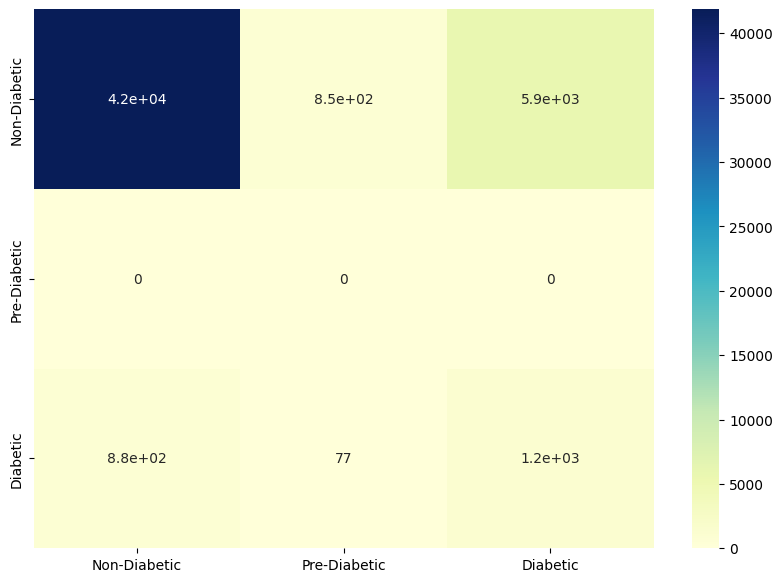

In [34]:
cm_df = pd.DataFrame(cm, index = [i for i in ['Non-Diabetic', 'Pre-Diabetic', 'Diabetic']], columns = [i for i in ['Non-Diabetic', 'Pre-Diabetic', 'Diabetic']])
plt.figure(figsize = (10,7))
sn.heatmap(cm_df, cmap="YlGnBu", annot=True)

### Training the MLP classifier using the best parameters obtained after grid search and cross validation using the PCA on training data to get the cumulative variance explained by different no. of components

In [ ]:
num_components = [3, 5, 10, 15, 20, 25]
variance = []

for num in num_components:
  # Initializing the PCA with defitive components
  pca = PCA(n_components=num)

  # Fit the PCA on the training data
  pca.fit(X_train)

  # Transform the train and test data as per the components of the PCA
  X_train_pca = pca.transform(X_train)
  X_test_pca = pca.transform(X_test)

  # Recording the explained variance for each number of components
  variance.append(np.sum(pca.explained_variance_ratio_))

  print("Cumulative variance explained by {} components is {}".format(num,variance[-1]))

  mlp_classifer = MLPClassifier(activation = 'relu', alpha=0.01, hidden_layer_sizes=(64, 64), max_iter = 30, solver='adam', random_state= 42)
  mlp_classifer.fit(X_train_pca, y_train)
  y_pred = mlp_classifer.predict(X_test_pca)
  print(f"Classification Report for total components: {num}")
  print(classification_report(y_pred, y_test))
  print()

Cumulative variance explained by 3 components is 0.44254713922655414
Classification Report for total components: 3


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92     48928
         1.0       0.00      0.00      0.00         0
         2.0       0.14      0.53      0.22      1808

    accuracy                           0.85     50736
   macro avg       0.37      0.46      0.38     50736
weighted avg       0.95      0.85      0.89     50736


Cumulative variance explained by 5 components is 0.6191998687853013


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for total components: 5
              precision    recall  f1-score   support

         0.0       0.99      0.85      0.92     49652
         1.0       0.00      0.00      0.00         0
         2.0       0.09      0.58      0.15      1084

    accuracy                           0.85     50736
   macro avg       0.36      0.48      0.36     50736
weighted avg       0.97      0.85      0.90     50736




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cumulative variance explained by 10 components is 0.8618245551141718


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for total components: 10
              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92     49326
         1.0       0.00      0.00      0.00         0
         2.0       0.12      0.59      0.20      1410

    accuracy                           0.85     50736
   macro avg       0.37      0.48      0.37     50736
weighted avg       0.96      0.85      0.90     50736


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Cumulative variance explained by 15 components is 0.9475985779258699


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for total components: 15
              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92     48246
         1.0       0.00      0.00      0.00         0
         2.0       0.19      0.54      0.28      2490

    accuracy                           0.85     50736
   macro avg       0.39      0.47      0.40     50736
weighted avg       0.94      0.85      0.89     50736




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cumulative variance explained by 20 components is 0.995073594383692


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for total components: 20


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92     47714
         1.0       0.00      0.00      0.00         0
         2.0       0.23      0.53      0.32      3022

    accuracy                           0.85     50736
   macro avg       0.40      0.47      0.41     50736
weighted avg       0.93      0.85      0.88     50736


Cumulative variance explained by 25 components is 0.9999999999999996


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for total components: 25
              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92     48479
         1.0       0.00      0.00      0.00         0
         2.0       0.18      0.55      0.27      2257

    accuracy                           0.85     50736
   macro avg       0.38      0.47      0.39     50736
weighted avg       0.94      0.85      0.89     50736




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


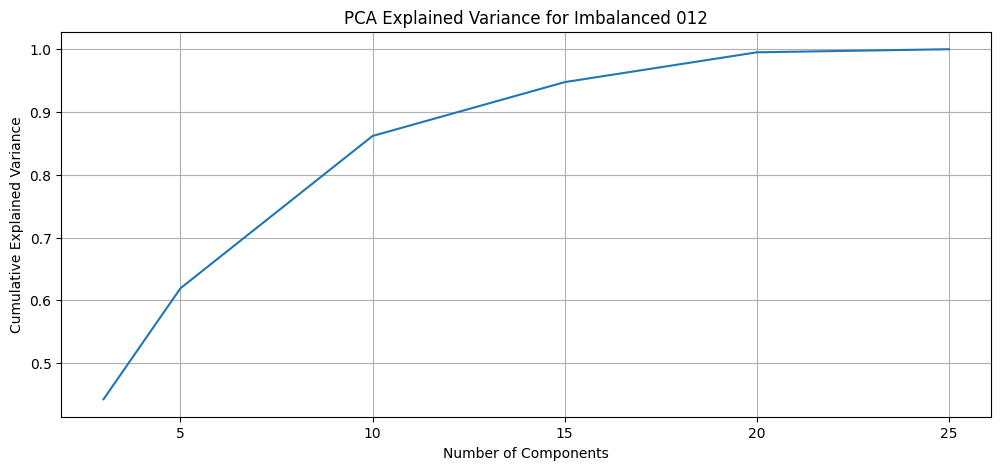

In [ ]:
### START CODE ###
plt.figure(figsize=(12,5))
plt.plot(num_components, variance)
plt.title("PCA Explained Variance for Imbalanced 012")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
### END CODE ###

plt.show()

# Training the model for 2-Class Balanced Split Diabetes Data

In [36]:
train_data = pd.read_csv('/content/drive/MyDrive/AML_Final_Project/Dataset/train_binary_split.csv')
test_data = pd.read_csv('/content/drive/MyDrive/AML_Final_Project/Dataset/test_binary_split.csv')

In [37]:
train_data.head()

,BMI,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,HighBP_0,HighBP_1,...,Veggies_1,HvyAlcoholConsump_0,HvyAlcoholConsump_1,AnyHealthcare_0,AnyHealthcare_1,NoDocbcCost_0,NoDocbcCost_1,Sex_0,Sex_1,Diabetes_binary
0,-0.119897,0.25,0.0,0.000000,0.0,0.750000,1.0,1.000000,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
1,-0.822423,0.50,0.5,0.200000,0.0,0.500000,0.8,0.000000,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,1.706673,0.50,0.0,0.333333,1.0,0.833333,0.8,0.428571,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,0.020609,0.50,0.0,0.033333,0.0,0.750000,0.8,0.571429,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
4,0.723136,0.50,0.0,0.000000,0.0,0.416667,0.6,0.571429,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [38]:
X_train = train_data.drop(['Diabetes_binary'], axis=1)
y_train = train_data['Diabetes_binary']

In [39]:
X_test = test_data.drop(['Diabetes_binary'], axis=1)
y_test = test_data['Diabetes_binary']

In [ ]:
mlp_classifer = MLPClassifier()
mlp_param_grid ={"hidden_layer_sizes": [(64, 64), (32, 32)],
                "activation": ['relu', 'tanh'],
                "alpha" : [0.01, 0.001],
                 "solver": ['adam'],
                "random_state": [42],
                "verbose" : [True],
                 "max_iter" : [30]}

In [ ]:
mlp_grid_search_clf = GridSearchCV(estimator=mlp_classifer, param_grid=mlp_param_grid, scoring='f1_weighted', cv=5, verbose=3)
mlp_grid_search_clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Iteration 1, loss = 0.53720015
Iteration 2, loss = 0.51019126
Iteration 3, loss = 0.50714668
Iteration 4, loss = 0.50632728
Iteration 5, loss = 0.50441353
Iteration 6, loss = 0.50385104
Iteration 7, loss = 0.50374988
Iteration 8, loss = 0.50249743
Iteration 9, loss = 0.50206004
Iteration 10, loss = 0.50154064
Iteration 11, loss = 0.50173803
Iteration 12, loss = 0.50061141
Iteration 13, loss = 0.50126242
Iteration 14, loss = 0.49976115
Iteration 15, loss = 0.49993845
Iteration 16, loss = 0.50031951
Iteration 17, loss = 0.49929016
Iteration 18, loss = 0.49876924
Iteration 19, loss = 0.49847352
Iteration 20, loss = 0.49842410
Iteration 21, loss = 0.49793989
Iteration 22, loss = 0.49818343
Iteration 23, loss = 0.49815228
Iteration 24, loss = 0.49731108
Iteration 25, loss = 0.49726024
Iteration 26, loss = 0.49661310
Iteration 27, loss = 0.49633539
Iteration 28, loss = 0.49599943
Iteration 29, loss = 0.49582048
Iteration 30, loss = 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53905145
Iteration 2, loss = 0.51214796
Iteration 3, loss = 0.50891989
Iteration 4, loss = 0.50748961
Iteration 5, loss = 0.50665241
Iteration 6, loss = 0.50539776
Iteration 7, loss = 0.50595781
Iteration 8, loss = 0.50464163
Iteration 9, loss = 0.50330295
Iteration 10, loss = 0.50289870
Iteration 11, loss = 0.50254731
Iteration 12, loss = 0.50205177
Iteration 13, loss = 0.50233061
Iteration 14, loss = 0.50151071
Iteration 15, loss = 0.50107613
Iteration 16, loss = 0.50130842
Iteration 17, loss = 0.50049698
Iteration 18, loss = 0.50027149
Iteration 19, loss = 0.49987240
Iteration 20, loss = 0.49932224
Iteration 21, loss = 0.49969853
Iteration 22, loss = 0.49964363
Iteration 23, loss = 0.49937522
Iteration 24, loss = 0.49919737
Iteration 25, loss = 0.49806173
Iteration 26, loss = 0.49785529
Iteration 27, loss = 0.49796294
Iteration 28, loss = 0.49727900
Iteration 29, loss = 0.49693966
Iteration 30, loss = 0.49704910
[CV 2/5] END activation=relu, alpha=0.01, hidden_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53828418
Iteration 2, loss = 0.51048805
Iteration 3, loss = 0.50689985
Iteration 4, loss = 0.50541216
Iteration 5, loss = 0.50443664
Iteration 6, loss = 0.50291612
Iteration 7, loss = 0.50301090
Iteration 8, loss = 0.50227399
Iteration 9, loss = 0.50184700
Iteration 10, loss = 0.50082235
Iteration 11, loss = 0.50104604
Iteration 12, loss = 0.50021059
Iteration 13, loss = 0.49978119
Iteration 14, loss = 0.49925864
Iteration 15, loss = 0.49881032
Iteration 16, loss = 0.49868718
Iteration 17, loss = 0.49800505
Iteration 18, loss = 0.49880915
Iteration 19, loss = 0.49778084
Iteration 20, loss = 0.49711572
Iteration 21, loss = 0.49757839
Iteration 22, loss = 0.49667042
Iteration 23, loss = 0.49689059
Iteration 24, loss = 0.49690132
Iteration 25, loss = 0.49536518
Iteration 26, loss = 0.49606763
Iteration 27, loss = 0.49543082
Iteration 28, loss = 0.49545110
Iteration 29, loss = 0.49480456
Iteration 30, loss = 0.49467861
[CV 3/5] END activation=relu, alpha=0.01, hidden_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53661934
Iteration 2, loss = 0.50880439
Iteration 3, loss = 0.50677136
Iteration 4, loss = 0.50519386
Iteration 5, loss = 0.50404682
Iteration 6, loss = 0.50261238
Iteration 7, loss = 0.50215629
Iteration 8, loss = 0.50157639
Iteration 9, loss = 0.50085181
Iteration 10, loss = 0.50064274
Iteration 11, loss = 0.50007629
Iteration 12, loss = 0.49921559
Iteration 13, loss = 0.49990823
Iteration 14, loss = 0.49909299
Iteration 15, loss = 0.49901090
Iteration 16, loss = 0.49835738
Iteration 17, loss = 0.49872049
Iteration 18, loss = 0.49769641
Iteration 19, loss = 0.49701437
Iteration 20, loss = 0.49713370
Iteration 21, loss = 0.49662840
Iteration 22, loss = 0.49681507
Iteration 23, loss = 0.49615344
Iteration 24, loss = 0.49589615
Iteration 25, loss = 0.49527371
Iteration 26, loss = 0.49505590
Iteration 27, loss = 0.49477615
Iteration 28, loss = 0.49491187
Iteration 29, loss = 0.49452759
Iteration 30, loss = 0.49541903
[CV 4/5] END activation=relu, alpha=0.01, hidden_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53868622
Iteration 2, loss = 0.51073999
Iteration 3, loss = 0.50826786
Iteration 4, loss = 0.50641797
Iteration 5, loss = 0.50588494
Iteration 6, loss = 0.50480679
Iteration 7, loss = 0.50349136
Iteration 8, loss = 0.50302309
Iteration 9, loss = 0.50281077
Iteration 10, loss = 0.50251552
Iteration 11, loss = 0.50166985
Iteration 12, loss = 0.50115337
Iteration 13, loss = 0.50232682
Iteration 14, loss = 0.50103009
Iteration 15, loss = 0.50038548
Iteration 16, loss = 0.50064671
Iteration 17, loss = 0.50032180
Iteration 18, loss = 0.49961422
Iteration 19, loss = 0.49857854
Iteration 20, loss = 0.49892097
Iteration 21, loss = 0.49868482
Iteration 22, loss = 0.49789833
Iteration 23, loss = 0.49758494
Iteration 24, loss = 0.49738227
Iteration 25, loss = 0.49671136
Iteration 26, loss = 0.49639094
Iteration 27, loss = 0.49672016
Iteration 28, loss = 0.49636077
Iteration 29, loss = 0.49567357
Iteration 30, loss = 0.49625098
[CV 5/5] END activation=relu, alpha=0.01, hidden_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.55011772
Iteration 2, loss = 0.51328183
Iteration 3, loss = 0.50942990
Iteration 4, loss = 0.50815943
Iteration 5, loss = 0.50682039
Iteration 6, loss = 0.50673908
Iteration 7, loss = 0.50481451
Iteration 8, loss = 0.50428933
Iteration 9, loss = 0.50393537
Iteration 10, loss = 0.50355007
Iteration 11, loss = 0.50304638
Iteration 12, loss = 0.50276901
Iteration 13, loss = 0.50267340
Iteration 14, loss = 0.50246286
Iteration 15, loss = 0.50146969
Iteration 16, loss = 0.50175400
Iteration 17, loss = 0.50118766
Iteration 18, loss = 0.50130142
Iteration 19, loss = 0.50134494
Iteration 20, loss = 0.50056163
Iteration 21, loss = 0.50076890
Iteration 22, loss = 0.50056967
Iteration 23, loss = 0.50050927
Iteration 24, loss = 0.49995488
Iteration 25, loss = 0.50022494
Iteration 26, loss = 0.49953037
Iteration 27, loss = 0.49982195
Iteration 28, loss = 0.49968892
Iteration 29, loss = 0.49927005
Iteration 30, loss = 0.49944396
[CV 1/5] END activation=relu, alpha=0.01, hidden_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.55173254
Iteration 2, loss = 0.51510147
Iteration 3, loss = 0.51061668
Iteration 4, loss = 0.50982135
Iteration 5, loss = 0.50839563
Iteration 6, loss = 0.50710688
Iteration 7, loss = 0.50604365
Iteration 8, loss = 0.50530244
Iteration 9, loss = 0.50552564
Iteration 10, loss = 0.50464066
Iteration 11, loss = 0.50434201
Iteration 12, loss = 0.50373559
Iteration 13, loss = 0.50380242
Iteration 14, loss = 0.50329504
Iteration 15, loss = 0.50261892
Iteration 16, loss = 0.50260562
Iteration 17, loss = 0.50258651
Iteration 18, loss = 0.50269341
Iteration 19, loss = 0.50210250
Iteration 20, loss = 0.50195613
Iteration 21, loss = 0.50242251
Iteration 22, loss = 0.50131588
Iteration 23, loss = 0.50165357
Iteration 24, loss = 0.50122165
Iteration 25, loss = 0.50101726
Iteration 26, loss = 0.50080024
Iteration 27, loss = 0.50084901
Iteration 28, loss = 0.50083892
Iteration 29, loss = 0.50021815
Iteration 30, loss = 0.50134188


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(32, 32), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.758 total time=   6.3s
Iteration 1, loss = 0.55197515
Iteration 2, loss = 0.51340260
Iteration 3, loss = 0.50848210
Iteration 4, loss = 0.50715036
Iteration 5, loss = 0.50558089
Iteration 6, loss = 0.50518209
Iteration 7, loss = 0.50382717
Iteration 8, loss = 0.50334677
Iteration 9, loss = 0.50387003
Iteration 10, loss = 0.50204040
Iteration 11, loss = 0.50263671
Iteration 12, loss = 0.50125837
Iteration 13, loss = 0.50104023
Iteration 14, loss = 0.50101777
Iteration 15, loss = 0.50057387
Iteration 16, loss = 0.50063180
Iteration 17, loss = 0.50019214
Iteration 18, loss = 0.50051797
Iteration 19, loss = 0.49999972
Iteration 20, loss = 0.49959164
Iteration 21, loss = 0.49980418
Iteration 22, loss = 0.49940195
Iteration 23, loss = 0.49904001
Iteration 24, loss = 0.49911343
Iteration 25, loss = 0.49895574
Iteration 26, loss = 0.49851329
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.55046463
Iteration 2, loss = 0.51286632
Iteration 3, loss = 0.50853825
Iteration 4, loss = 0.50597994
Iteration 5, loss = 0.50637076
Iteration 6, loss = 0.50466631
Iteration 7, loss = 0.50378740
Iteration 8, loss = 0.50328996
Iteration 9, loss = 0.50251549
Iteration 10, loss = 0.50271680
Iteration 11, loss = 0.50249032
Iteration 12, loss = 0.50164287
Iteration 13, loss = 0.50155933
Iteration 14, loss = 0.50078631
Iteration 15, loss = 0.50117699
Iteration 16, loss = 0.50062752
Iteration 17, loss = 0.50027514
Iteration 18, loss = 0.50001836
Iteration 19, loss = 0.49948794
Iteration 20, loss = 0.49958419
Iteration 21, loss = 0.49929212
Iteration 22, loss = 0.49885879
Iteration 23, loss = 0.49863062
Iteration 24, loss = 0.49895462
Iteration 25, loss = 0.49896619
Iteration 26, loss = 0.49858796
Iteration 27, loss = 0.49789203
Iteration 28, loss = 0.49829049
Iteration 29, loss = 0.49774467
Iteration 30, loss = 0.49801756
[CV 4/5] END activation=relu, alpha=0.01, hidden_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.55219369
Iteration 2, loss = 0.51374031
Iteration 3, loss = 0.50969718
Iteration 4, loss = 0.50765259
Iteration 5, loss = 0.50744379
Iteration 6, loss = 0.50597024
Iteration 7, loss = 0.50513094
Iteration 8, loss = 0.50485984
Iteration 9, loss = 0.50430636
Iteration 10, loss = 0.50391592
Iteration 11, loss = 0.50357620
Iteration 12, loss = 0.50320907
Iteration 13, loss = 0.50332485
Iteration 14, loss = 0.50245672
Iteration 15, loss = 0.50281293
Iteration 16, loss = 0.50232011
Iteration 17, loss = 0.50226966
Iteration 18, loss = 0.50161253
Iteration 19, loss = 0.50146079
Iteration 20, loss = 0.50147770
Iteration 21, loss = 0.50099767
Iteration 22, loss = 0.50127402
Iteration 23, loss = 0.50155310
Iteration 24, loss = 0.50088929
Iteration 25, loss = 0.50092411
Iteration 26, loss = 0.50063374
Iteration 27, loss = 0.50035815
Iteration 28, loss = 0.50072127
Iteration 29, loss = 0.50053600
Iteration 30, loss = 0.50001332
[CV 5/5] END activation=relu, alpha=0.01, hidden_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53487885
Iteration 2, loss = 0.50796891
Iteration 3, loss = 0.50504502
Iteration 4, loss = 0.50415447
Iteration 5, loss = 0.50225688
Iteration 6, loss = 0.50151110
Iteration 7, loss = 0.50153129
Iteration 8, loss = 0.50014861
Iteration 9, loss = 0.49957783
Iteration 10, loss = 0.49913339
Iteration 11, loss = 0.49923491
Iteration 12, loss = 0.49799988
Iteration 13, loss = 0.49842489
Iteration 14, loss = 0.49701515
Iteration 15, loss = 0.49711675
Iteration 16, loss = 0.49732393
Iteration 17, loss = 0.49627695
Iteration 18, loss = 0.49550680
Iteration 19, loss = 0.49535497
Iteration 20, loss = 0.49508503
Iteration 21, loss = 0.49476141
Iteration 22, loss = 0.49485980
Iteration 23, loss = 0.49467761
Iteration 24, loss = 0.49360398
Iteration 25, loss = 0.49353615
Iteration 26, loss = 0.49308251
Iteration 27, loss = 0.49250269
Iteration 28, loss = 0.49210299
Iteration 29, loss = 0.49168310
Iteration 30, loss = 0.49135834
[CV 1/5] END activation=relu, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53690860
Iteration 2, loss = 0.50983330
Iteration 3, loss = 0.50670594
Iteration 4, loss = 0.50515928
Iteration 5, loss = 0.50447482
Iteration 6, loss = 0.50305118
Iteration 7, loss = 0.50370584
Iteration 8, loss = 0.50221542
Iteration 9, loss = 0.50089788
Iteration 10, loss = 0.50039100
Iteration 11, loss = 0.50006565
Iteration 12, loss = 0.49937692
Iteration 13, loss = 0.49960250
Iteration 14, loss = 0.49889796
Iteration 15, loss = 0.49831309
Iteration 16, loss = 0.49838649
Iteration 17, loss = 0.49742139
Iteration 18, loss = 0.49714468
Iteration 19, loss = 0.49655450
Iteration 20, loss = 0.49606915
Iteration 21, loss = 0.49588325
Iteration 22, loss = 0.49604463
Iteration 23, loss = 0.49559374
Iteration 24, loss = 0.49519248
Iteration 25, loss = 0.49412368
Iteration 26, loss = 0.49384952
Iteration 27, loss = 0.49391211
Iteration 28, loss = 0.49305417
Iteration 29, loss = 0.49246695
Iteration 30, loss = 0.49248615
[CV 2/5] END activation=relu, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53589344
Iteration 2, loss = 0.50816939
Iteration 3, loss = 0.50477846
Iteration 4, loss = 0.50319731
Iteration 5, loss = 0.50232457
Iteration 6, loss = 0.50075518
Iteration 7, loss = 0.50075280
Iteration 8, loss = 0.49982309
Iteration 9, loss = 0.49951649
Iteration 10, loss = 0.49831321
Iteration 11, loss = 0.49845708
Iteration 12, loss = 0.49751626
Iteration 13, loss = 0.49690102
Iteration 14, loss = 0.49623482
Iteration 15, loss = 0.49562352
Iteration 16, loss = 0.49547560
Iteration 17, loss = 0.49469374
Iteration 18, loss = 0.49533121
Iteration 19, loss = 0.49423224
Iteration 20, loss = 0.49341115
Iteration 21, loss = 0.49373706
Iteration 22, loss = 0.49277339
Iteration 23, loss = 0.49280730
Iteration 24, loss = 0.49266685
Iteration 25, loss = 0.49099260
Iteration 26, loss = 0.49144064
Iteration 27, loss = 0.49067296
Iteration 28, loss = 0.49014208
Iteration 29, loss = 0.48981848
Iteration 30, loss = 0.48944357
[CV 3/5] END activation=relu, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53421111
Iteration 2, loss = 0.50658680
Iteration 3, loss = 0.50453089
Iteration 4, loss = 0.50288356
Iteration 5, loss = 0.50174131
Iteration 6, loss = 0.50036656
Iteration 7, loss = 0.49983057
Iteration 8, loss = 0.49916472
Iteration 9, loss = 0.49833257
Iteration 10, loss = 0.49804198
Iteration 11, loss = 0.49732118
Iteration 12, loss = 0.49643504
Iteration 13, loss = 0.49697143
Iteration 14, loss = 0.49609140
Iteration 15, loss = 0.49595988
Iteration 16, loss = 0.49506401
Iteration 17, loss = 0.49545756
Iteration 18, loss = 0.49416976
Iteration 19, loss = 0.49348136
Iteration 20, loss = 0.49319465
Iteration 21, loss = 0.49278264
Iteration 22, loss = 0.49255417
Iteration 23, loss = 0.49176369
Iteration 24, loss = 0.49123920
Iteration 25, loss = 0.49038849
Iteration 26, loss = 0.48996000
Iteration 27, loss = 0.48964956
Iteration 28, loss = 0.48964455
Iteration 29, loss = 0.48874982
Iteration 30, loss = 0.48946927
[CV 4/5] END activation=relu, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53634597
Iteration 2, loss = 0.50843882
Iteration 3, loss = 0.50593175
Iteration 4, loss = 0.50398869
Iteration 5, loss = 0.50364457
Iteration 6, loss = 0.50254273
Iteration 7, loss = 0.50126464
Iteration 8, loss = 0.50069479
Iteration 9, loss = 0.50047248
Iteration 10, loss = 0.50000720
Iteration 11, loss = 0.49912792
Iteration 12, loss = 0.49846385
Iteration 13, loss = 0.49960602
Iteration 14, loss = 0.49827647
Iteration 15, loss = 0.49753831
Iteration 16, loss = 0.49752426
Iteration 17, loss = 0.49726967
Iteration 18, loss = 0.49639939
Iteration 19, loss = 0.49524775
Iteration 20, loss = 0.49544055
Iteration 21, loss = 0.49525223
Iteration 22, loss = 0.49434096
Iteration 23, loss = 0.49400335
Iteration 24, loss = 0.49364349
Iteration 25, loss = 0.49264798
Iteration 26, loss = 0.49225379
Iteration 27, loss = 0.49252540
Iteration 28, loss = 0.49200112
Iteration 29, loss = 0.49118292
Iteration 30, loss = 0.49126915
[CV 5/5] END activation=relu, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.54848381
Iteration 2, loss = 0.51164759
Iteration 3, loss = 0.50796366
Iteration 4, loss = 0.50653551
Iteration 5, loss = 0.50503280
Iteration 6, loss = 0.50496523
Iteration 7, loss = 0.50320207
Iteration 8, loss = 0.50268599
Iteration 9, loss = 0.50232724
Iteration 10, loss = 0.50194973
Iteration 11, loss = 0.50140206
Iteration 12, loss = 0.50124434
Iteration 13, loss = 0.50102267
Iteration 14, loss = 0.50081940
Iteration 15, loss = 0.49979613
Iteration 16, loss = 0.50005853
Iteration 17, loss = 0.49945010
Iteration 18, loss = 0.49960321
Iteration 19, loss = 0.49959312
Iteration 20, loss = 0.49885807
Iteration 21, loss = 0.49897972
Iteration 22, loss = 0.49866555
Iteration 23, loss = 0.49859208
Iteration 24, loss = 0.49800526
Iteration 25, loss = 0.49816893
Iteration 26, loss = 0.49734917
Iteration 27, loss = 0.49774968
Iteration 28, loss = 0.49754061
Iteration 29, loss = 0.49713606
Iteration 30, loss = 0.49721340
[CV 1/5] END activation=relu, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.55022222
Iteration 2, loss = 0.51354110
Iteration 3, loss = 0.50919428
Iteration 4, loss = 0.50837567
Iteration 5, loss = 0.50695570
Iteration 6, loss = 0.50564357
Iteration 7, loss = 0.50448770
Iteration 8, loss = 0.50380275
Iteration 9, loss = 0.50395376
Iteration 10, loss = 0.50305520
Iteration 11, loss = 0.50271825
Iteration 12, loss = 0.50221378
Iteration 13, loss = 0.50215582
Iteration 14, loss = 0.50169813
Iteration 15, loss = 0.50089675
Iteration 16, loss = 0.50098202
Iteration 17, loss = 0.50095159
Iteration 18, loss = 0.50087245
Iteration 19, loss = 0.50045856
Iteration 20, loss = 0.50042626
Iteration 21, loss = 0.50077569
Iteration 22, loss = 0.49960261
Iteration 23, loss = 0.50003346
Iteration 24, loss = 0.49933511
Iteration 25, loss = 0.49927279
Iteration 26, loss = 0.49912176
Iteration 27, loss = 0.49904802
Iteration 28, loss = 0.49906853
Iteration 29, loss = 0.49835276
Iteration 30, loss = 0.49935852
[CV 2/5] END activation=relu, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.55046687
Iteration 2, loss = 0.51197635
Iteration 3, loss = 0.50692143
Iteration 4, loss = 0.50571226
Iteration 5, loss = 0.50415898
Iteration 6, loss = 0.50365462
Iteration 7, loss = 0.50241092
Iteration 8, loss = 0.50185343
Iteration 9, loss = 0.50237699
Iteration 10, loss = 0.50046644
Iteration 11, loss = 0.50091767
Iteration 12, loss = 0.49954828
Iteration 13, loss = 0.49925791
Iteration 14, loss = 0.49917746
Iteration 15, loss = 0.49880097
Iteration 16, loss = 0.49872833
Iteration 17, loss = 0.49831624
Iteration 18, loss = 0.49861293
Iteration 19, loss = 0.49796448
Iteration 20, loss = 0.49757785
Iteration 21, loss = 0.49759819
Iteration 22, loss = 0.49713434
Iteration 23, loss = 0.49685087
Iteration 24, loss = 0.49685079
Iteration 25, loss = 0.49656322
Iteration 26, loss = 0.49611583
Iteration 27, loss = 0.49606909
Iteration 28, loss = 0.49580867
Iteration 29, loss = 0.49532115
Iteration 30, loss = 0.49637467
[CV 3/5] END activation=relu, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.54904099
Iteration 2, loss = 0.51129237
Iteration 3, loss = 0.50707802
Iteration 4, loss = 0.50444782
Iteration 5, loss = 0.50473266
Iteration 6, loss = 0.50302660
Iteration 7, loss = 0.50226192
Iteration 8, loss = 0.50180902
Iteration 9, loss = 0.50104611
Iteration 10, loss = 0.50121176
Iteration 11, loss = 0.50094394
Iteration 12, loss = 0.50010177
Iteration 13, loss = 0.50013310
Iteration 14, loss = 0.49931011
Iteration 15, loss = 0.49978018
Iteration 16, loss = 0.49913298
Iteration 17, loss = 0.49881053
Iteration 18, loss = 0.49854512
Iteration 19, loss = 0.49803940
Iteration 20, loss = 0.49796614
Iteration 21, loss = 0.49774320
Iteration 22, loss = 0.49717026
Iteration 23, loss = 0.49701670
Iteration 24, loss = 0.49706543
Iteration 25, loss = 0.49702679
Iteration 26, loss = 0.49682619
Iteration 27, loss = 0.49598039
Iteration 28, loss = 0.49629772
Iteration 29, loss = 0.49568448
Iteration 30, loss = 0.49585021
[CV 4/5] END activation=relu, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.55080034
Iteration 2, loss = 0.51244523
Iteration 3, loss = 0.50842002
Iteration 4, loss = 0.50636796
Iteration 5, loss = 0.50621817
Iteration 6, loss = 0.50481349
Iteration 7, loss = 0.50389474
Iteration 8, loss = 0.50356031
Iteration 9, loss = 0.50297024
Iteration 10, loss = 0.50256274
Iteration 11, loss = 0.50215110
Iteration 12, loss = 0.50182818
Iteration 13, loss = 0.50180608
Iteration 14, loss = 0.50093310
Iteration 15, loss = 0.50139428
Iteration 16, loss = 0.50083411
Iteration 17, loss = 0.50072710
Iteration 18, loss = 0.50007385
Iteration 19, loss = 0.49993700
Iteration 20, loss = 0.49987093
Iteration 21, loss = 0.49933429
Iteration 22, loss = 0.49959536
Iteration 23, loss = 0.49984023
Iteration 24, loss = 0.49919937
Iteration 25, loss = 0.49921151
Iteration 26, loss = 0.49895246
Iteration 27, loss = 0.49848777
Iteration 28, loss = 0.49902803
Iteration 29, loss = 0.49862522
Iteration 30, loss = 0.49808299
[CV 5/5] END activation=relu, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53074297
Iteration 2, loss = 0.51399419
Iteration 3, loss = 0.51127225
Iteration 4, loss = 0.51038881
Iteration 5, loss = 0.50823940
Iteration 6, loss = 0.50765060
Iteration 7, loss = 0.50762010
Iteration 8, loss = 0.50652890
Iteration 9, loss = 0.50608310
Iteration 10, loss = 0.50577592
Iteration 11, loss = 0.50595961
Iteration 12, loss = 0.50485807
Iteration 13, loss = 0.50555042
Iteration 14, loss = 0.50437789
Iteration 15, loss = 0.50453636
Iteration 16, loss = 0.50485865
Iteration 17, loss = 0.50386508
Iteration 18, loss = 0.50383203
Iteration 19, loss = 0.50362297
Iteration 20, loss = 0.50377162
Iteration 21, loss = 0.50329754
Iteration 22, loss = 0.50366898
Iteration 23, loss = 0.50352631
Iteration 24, loss = 0.50352499
Iteration 25, loss = 0.50318182
Iteration 26, loss = 0.50255322
Iteration 27, loss = 0.50277404
Iteration 28, loss = 0.50264537
Iteration 29, loss = 0.50231815
Iteration 30, loss = 0.50213260
[CV 1/5] END activation=tanh, alpha=0.01, hidden_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53206504
Iteration 2, loss = 0.51511107
Iteration 3, loss = 0.51234788
Iteration 4, loss = 0.51114198
Iteration 5, loss = 0.51019384
Iteration 6, loss = 0.50915375
Iteration 7, loss = 0.50940576
Iteration 8, loss = 0.50834689
Iteration 9, loss = 0.50708258
Iteration 10, loss = 0.50680055
Iteration 11, loss = 0.50654034
Iteration 12, loss = 0.50597376
Iteration 13, loss = 0.50622930
Iteration 14, loss = 0.50583528
Iteration 15, loss = 0.50558597
Iteration 16, loss = 0.50590686
Iteration 17, loss = 0.50512955
Iteration 18, loss = 0.50511388
Iteration 19, loss = 0.50478541
Iteration 20, loss = 0.50434570
Iteration 21, loss = 0.50440849
Iteration 22, loss = 0.50500764
Iteration 23, loss = 0.50454836
Iteration 24, loss = 0.50474684
Iteration 25, loss = 0.50375589
Iteration 26, loss = 0.50359889
Iteration 27, loss = 0.50381446
Iteration 28, loss = 0.50373896
Iteration 29, loss = 0.50300250
Iteration 30, loss = 0.50351449
[CV 2/5] END activation=tanh, alpha=0.01, hidden_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53054045
Iteration 2, loss = 0.51297425
Iteration 3, loss = 0.51004170
Iteration 4, loss = 0.50907285
Iteration 5, loss = 0.50789361
Iteration 6, loss = 0.50642089
Iteration 7, loss = 0.50648640
Iteration 8, loss = 0.50581771
Iteration 9, loss = 0.50532501
Iteration 10, loss = 0.50471723
Iteration 11, loss = 0.50476364
Iteration 12, loss = 0.50418408
Iteration 13, loss = 0.50390420
Iteration 14, loss = 0.50347023
Iteration 15, loss = 0.50324631
Iteration 16, loss = 0.50329161
Iteration 17, loss = 0.50280121
Iteration 18, loss = 0.50354578
Iteration 19, loss = 0.50278406
Iteration 20, loss = 0.50201872
Iteration 21, loss = 0.50246766
Iteration 22, loss = 0.50201966
Iteration 23, loss = 0.50206512
Iteration 24, loss = 0.50246552
Iteration 25, loss = 0.50117611
Iteration 26, loss = 0.50186115
Iteration 27, loss = 0.50130013
Iteration 28, loss = 0.50155159
Iteration 29, loss = 0.50098367
Iteration 30, loss = 0.50104932


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.751 total time=  34.1s
Iteration 1, loss = 0.53060253
Iteration 2, loss = 0.51181435
Iteration 3, loss = 0.51059126
Iteration 4, loss = 0.50916676
Iteration 5, loss = 0.50785944
Iteration 6, loss = 0.50676549
Iteration 7, loss = 0.50638352
Iteration 8, loss = 0.50589115
Iteration 9, loss = 0.50506765
Iteration 10, loss = 0.50483865
Iteration 11, loss = 0.50451766
Iteration 12, loss = 0.50378501
Iteration 13, loss = 0.50440253
Iteration 14, loss = 0.50363875
Iteration 15, loss = 0.50353282
Iteration 16, loss = 0.50315689
Iteration 17, loss = 0.50372534
Iteration 18, loss = 0.50267050
Iteration 19, loss = 0.50242651
Iteration 20, loss = 0.50240255
Iteration 21, loss = 0.50203536
Iteration 22, loss = 0.50217868
Iteration 23, loss = 0.50206405
Iteration 24, loss = 0.50174456
Iteration 25, loss = 0.50120727
Iteration 26, loss = 0.50103885
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53296867
Iteration 2, loss = 0.51388471
Iteration 3, loss = 0.51216369
Iteration 4, loss = 0.51017480
Iteration 5, loss = 0.50963865
Iteration 6, loss = 0.50859604
Iteration 7, loss = 0.50747001
Iteration 8, loss = 0.50720578
Iteration 9, loss = 0.50681708
Iteration 10, loss = 0.50638218
Iteration 11, loss = 0.50582739
Iteration 12, loss = 0.50532561
Iteration 13, loss = 0.50653396
Iteration 14, loss = 0.50556185
Iteration 15, loss = 0.50471814
Iteration 16, loss = 0.50513335
Iteration 17, loss = 0.50511488
Iteration 18, loss = 0.50448001
Iteration 19, loss = 0.50364511
Iteration 20, loss = 0.50394610
Iteration 21, loss = 0.50415812
Iteration 22, loss = 0.50364932
Iteration 23, loss = 0.50337835
Iteration 24, loss = 0.50335346
Iteration 25, loss = 0.50266752
Iteration 26, loss = 0.50248619
Iteration 27, loss = 0.50285804
Iteration 28, loss = 0.50272043
Iteration 29, loss = 0.50237948
Iteration 30, loss = 0.50258779
[CV 5/5] END activation=tanh, alpha=0.01, hidden_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53814836
Iteration 2, loss = 0.51326679
Iteration 3, loss = 0.51061732
Iteration 4, loss = 0.50952254
Iteration 5, loss = 0.50856395
Iteration 6, loss = 0.50845541
Iteration 7, loss = 0.50700194
Iteration 8, loss = 0.50637028
Iteration 9, loss = 0.50621073
Iteration 10, loss = 0.50588668
Iteration 11, loss = 0.50538008
Iteration 12, loss = 0.50524438
Iteration 13, loss = 0.50493742
Iteration 14, loss = 0.50482307
Iteration 15, loss = 0.50397178
Iteration 16, loss = 0.50419412
Iteration 17, loss = 0.50374442
Iteration 18, loss = 0.50383756
Iteration 19, loss = 0.50379649
Iteration 20, loss = 0.50336501
Iteration 21, loss = 0.50331784
Iteration 22, loss = 0.50318872
Iteration 23, loss = 0.50299126
Iteration 24, loss = 0.50253146
Iteration 25, loss = 0.50273944
Iteration 26, loss = 0.50209027
Iteration 27, loss = 0.50250520
Iteration 28, loss = 0.50222368
Iteration 29, loss = 0.50217090
Iteration 30, loss = 0.50215378
[CV 1/5] END activation=tanh, alpha=0.01, hidden_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53989281
Iteration 2, loss = 0.51464717
Iteration 3, loss = 0.51147102
Iteration 4, loss = 0.51119818
Iteration 5, loss = 0.51044528
Iteration 6, loss = 0.50924751
Iteration 7, loss = 0.50832645
Iteration 8, loss = 0.50763935
Iteration 9, loss = 0.50798642
Iteration 10, loss = 0.50720150
Iteration 11, loss = 0.50677882
Iteration 12, loss = 0.50635317
Iteration 13, loss = 0.50624983
Iteration 14, loss = 0.50587370
Iteration 15, loss = 0.50508772
Iteration 16, loss = 0.50529475
Iteration 17, loss = 0.50519444
Iteration 18, loss = 0.50528792
Iteration 19, loss = 0.50476830
Iteration 20, loss = 0.50479657
Iteration 21, loss = 0.50511771
Iteration 22, loss = 0.50417876
Iteration 23, loss = 0.50447273
Iteration 24, loss = 0.50409488
Iteration 25, loss = 0.50391988
Iteration 26, loss = 0.50373987
Iteration 27, loss = 0.50377967
Iteration 28, loss = 0.50371681
Iteration 29, loss = 0.50325477
Iteration 30, loss = 0.50429514
[CV 2/5] END activation=tanh, alpha=0.01, hidden_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.54047403
Iteration 2, loss = 0.51359597
Iteration 3, loss = 0.50983509
Iteration 4, loss = 0.50937547
Iteration 5, loss = 0.50797998
Iteration 6, loss = 0.50751571
Iteration 7, loss = 0.50630186
Iteration 8, loss = 0.50578575
Iteration 9, loss = 0.50633648
Iteration 10, loss = 0.50480527
Iteration 11, loss = 0.50503931
Iteration 12, loss = 0.50389322
Iteration 13, loss = 0.50368211
Iteration 14, loss = 0.50351024
Iteration 15, loss = 0.50320326
Iteration 16, loss = 0.50326533
Iteration 17, loss = 0.50274163
Iteration 18, loss = 0.50304389
Iteration 19, loss = 0.50268522
Iteration 20, loss = 0.50241043
Iteration 21, loss = 0.50230562
Iteration 22, loss = 0.50201718
Iteration 23, loss = 0.50171511
Iteration 24, loss = 0.50180847
Iteration 25, loss = 0.50169750
Iteration 26, loss = 0.50137543
Iteration 27, loss = 0.50133909
Iteration 28, loss = 0.50144781
Iteration 29, loss = 0.50097280
Iteration 30, loss = 0.50176827
[CV 3/5] END activation=tanh, alpha=0.01, hidden_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53926641
Iteration 2, loss = 0.51236555
Iteration 3, loss = 0.50969883
Iteration 4, loss = 0.50783158
Iteration 5, loss = 0.50824922
Iteration 6, loss = 0.50712069
Iteration 7, loss = 0.50640421
Iteration 8, loss = 0.50570979
Iteration 9, loss = 0.50493165
Iteration 10, loss = 0.50509250
Iteration 11, loss = 0.50473523
Iteration 12, loss = 0.50421035
Iteration 13, loss = 0.50400434
Iteration 14, loss = 0.50326620
Iteration 15, loss = 0.50363098
Iteration 16, loss = 0.50341856
Iteration 17, loss = 0.50285043
Iteration 18, loss = 0.50273601
Iteration 19, loss = 0.50231886
Iteration 20, loss = 0.50237978
Iteration 21, loss = 0.50216841
Iteration 22, loss = 0.50192338
Iteration 23, loss = 0.50161918
Iteration 24, loss = 0.50168608
Iteration 25, loss = 0.50172994
Iteration 26, loss = 0.50149442
Iteration 27, loss = 0.50087105
Iteration 28, loss = 0.50136459
Iteration 29, loss = 0.50078135
Iteration 30, loss = 0.50097406
[CV 4/5] END activation=tanh, alpha=0.01, hidden_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.54038819
Iteration 2, loss = 0.51410191
Iteration 3, loss = 0.51129422
Iteration 4, loss = 0.50979267
Iteration 5, loss = 0.50964523
Iteration 6, loss = 0.50859667
Iteration 7, loss = 0.50792146
Iteration 8, loss = 0.50749661
Iteration 9, loss = 0.50705784
Iteration 10, loss = 0.50673376
Iteration 11, loss = 0.50635239
Iteration 12, loss = 0.50616723
Iteration 13, loss = 0.50599206
Iteration 14, loss = 0.50521590
Iteration 15, loss = 0.50538227
Iteration 16, loss = 0.50514349
Iteration 17, loss = 0.50495993
Iteration 18, loss = 0.50437855
Iteration 19, loss = 0.50416962
Iteration 20, loss = 0.50409875
Iteration 21, loss = 0.50379352
Iteration 22, loss = 0.50392221
Iteration 23, loss = 0.50415170
Iteration 24, loss = 0.50354602
Iteration 25, loss = 0.50340402
Iteration 26, loss = 0.50346704
Iteration 27, loss = 0.50304651
Iteration 28, loss = 0.50363215
Iteration 29, loss = 0.50302028
Iteration 30, loss = 0.50271308
[CV 5/5] END activation=tanh, alpha=0.01, hidden_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.52818811
Iteration 2, loss = 0.51140939
Iteration 3, loss = 0.50867820
Iteration 4, loss = 0.50778799
Iteration 5, loss = 0.50562875
Iteration 6, loss = 0.50503180
Iteration 7, loss = 0.50500242
Iteration 8, loss = 0.50389376
Iteration 9, loss = 0.50343391
Iteration 10, loss = 0.50312012
Iteration 11, loss = 0.50329674
Iteration 12, loss = 0.50217161
Iteration 13, loss = 0.50284711
Iteration 14, loss = 0.50166491
Iteration 15, loss = 0.50178170
Iteration 16, loss = 0.50209890
Iteration 17, loss = 0.50109348
Iteration 18, loss = 0.50102405
Iteration 19, loss = 0.50081527
Iteration 20, loss = 0.50093115
Iteration 21, loss = 0.50038262
Iteration 22, loss = 0.50074925
Iteration 23, loss = 0.50056510
Iteration 24, loss = 0.50052715
Iteration 25, loss = 0.50016062
Iteration 26, loss = 0.49948850
Iteration 27, loss = 0.49961033
Iteration 28, loss = 0.49948615
Iteration 29, loss = 0.49908625
Iteration 30, loss = 0.49885068
[CV 1/5] END activation=tanh, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.52951107
Iteration 2, loss = 0.51253228
Iteration 3, loss = 0.50975894
Iteration 4, loss = 0.50854294
Iteration 5, loss = 0.50758647
Iteration 6, loss = 0.50652853
Iteration 7, loss = 0.50677952
Iteration 8, loss = 0.50569519
Iteration 9, loss = 0.50441851
Iteration 10, loss = 0.50412134
Iteration 11, loss = 0.50384783
Iteration 12, loss = 0.50325625
Iteration 13, loss = 0.50349427
Iteration 14, loss = 0.50307853
Iteration 15, loss = 0.50280111
Iteration 16, loss = 0.50311151
Iteration 17, loss = 0.50229606
Iteration 18, loss = 0.50223078
Iteration 19, loss = 0.50189975
Iteration 20, loss = 0.50142319
Iteration 21, loss = 0.50143852
Iteration 22, loss = 0.50208248
Iteration 23, loss = 0.50152100
Iteration 24, loss = 0.50170379
Iteration 25, loss = 0.50066800
Iteration 26, loss = 0.50050414
Iteration 27, loss = 0.50063747
Iteration 28, loss = 0.50054887
Iteration 29, loss = 0.49975484
Iteration 30, loss = 0.50023139
[CV 2/5] END activation=tanh, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.52798351
Iteration 2, loss = 0.51039431
Iteration 3, loss = 0.50744338
Iteration 4, loss = 0.50646807
Iteration 5, loss = 0.50528041
Iteration 6, loss = 0.50379182
Iteration 7, loss = 0.50384392
Iteration 8, loss = 0.50315824
Iteration 9, loss = 0.50264929
Iteration 10, loss = 0.50202504
Iteration 11, loss = 0.50205189
Iteration 12, loss = 0.50145600
Iteration 13, loss = 0.50114748
Iteration 14, loss = 0.50068008
Iteration 15, loss = 0.50042738
Iteration 16, loss = 0.50045034
Iteration 17, loss = 0.49992063
Iteration 18, loss = 0.50059596
Iteration 19, loss = 0.49984617
Iteration 20, loss = 0.49901745
Iteration 21, loss = 0.49940855
Iteration 22, loss = 0.49896695
Iteration 23, loss = 0.49895330
Iteration 24, loss = 0.49930363
Iteration 25, loss = 0.49799843
Iteration 26, loss = 0.49864345
Iteration 27, loss = 0.49801367
Iteration 28, loss = 0.49826807
Iteration 29, loss = 0.49763098
Iteration 30, loss = 0.49763153
[CV 3/5] END activation=tanh, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.52805108
Iteration 2, loss = 0.50923540
Iteration 3, loss = 0.50799948
Iteration 4, loss = 0.50655961
Iteration 5, loss = 0.50524013
Iteration 6, loss = 0.50412426
Iteration 7, loss = 0.50372801
Iteration 8, loss = 0.50321394
Iteration 9, loss = 0.50237137
Iteration 10, loss = 0.50212514
Iteration 11, loss = 0.50178000
Iteration 12, loss = 0.50102247
Iteration 13, loss = 0.50160154
Iteration 14, loss = 0.50081609
Iteration 15, loss = 0.50068508
Iteration 16, loss = 0.50027986
Iteration 17, loss = 0.50082534
Iteration 18, loss = 0.49972126
Iteration 19, loss = 0.49943319
Iteration 20, loss = 0.49940918
Iteration 21, loss = 0.49897604
Iteration 22, loss = 0.49905761
Iteration 23, loss = 0.49893342
Iteration 24, loss = 0.49858510
Iteration 25, loss = 0.49797235
Iteration 26, loss = 0.49776578
Iteration 27, loss = 0.49737769
Iteration 28, loss = 0.49768950
Iteration 29, loss = 0.49738079
Iteration 30, loss = 0.49796718
[CV 4/5] END activation=tanh, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53041473
Iteration 2, loss = 0.51130236
Iteration 3, loss = 0.50957583
Iteration 4, loss = 0.50757333
Iteration 5, loss = 0.50703184
Iteration 6, loss = 0.50597956
Iteration 7, loss = 0.50484048
Iteration 8, loss = 0.50456227
Iteration 9, loss = 0.50416316
Iteration 10, loss = 0.50371896
Iteration 11, loss = 0.50314863
Iteration 12, loss = 0.50263271
Iteration 13, loss = 0.50380855
Iteration 14, loss = 0.50282920
Iteration 15, loss = 0.50196869
Iteration 16, loss = 0.50232166
Iteration 17, loss = 0.50230243
Iteration 18, loss = 0.50164565
Iteration 19, loss = 0.50077422
Iteration 20, loss = 0.50108734
Iteration 21, loss = 0.50123627
Iteration 22, loss = 0.50068205
Iteration 23, loss = 0.50039766
Iteration 24, loss = 0.50033650
Iteration 25, loss = 0.49957503
Iteration 26, loss = 0.49936064
Iteration 27, loss = 0.49971343
Iteration 28, loss = 0.49948943
Iteration 29, loss = 0.49910864
Iteration 30, loss = 0.49926188
[CV 5/5] END activation=tanh, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53656127
Iteration 2, loss = 0.51164768
Iteration 3, loss = 0.50899351
Iteration 4, loss = 0.50789240
Iteration 5, loss = 0.50692395
Iteration 6, loss = 0.50680313
Iteration 7, loss = 0.50533523
Iteration 8, loss = 0.50468072
Iteration 9, loss = 0.50450442
Iteration 10, loss = 0.50416617
Iteration 11, loss = 0.50363606
Iteration 12, loss = 0.50348023
Iteration 13, loss = 0.50314495
Iteration 14, loss = 0.50300714
Iteration 15, loss = 0.50212071
Iteration 16, loss = 0.50230718
Iteration 17, loss = 0.50184142
Iteration 18, loss = 0.50190879
Iteration 19, loss = 0.50183198
Iteration 20, loss = 0.50139194
Iteration 21, loss = 0.50130283
Iteration 22, loss = 0.50115376
Iteration 23, loss = 0.50092941
Iteration 24, loss = 0.50043510
Iteration 25, loss = 0.50061550
Iteration 26, loss = 0.49993870
Iteration 27, loss = 0.50033957
Iteration 28, loss = 0.50002605
Iteration 29, loss = 0.49996806
Iteration 30, loss = 0.49990959
[CV 1/5] END activation=tanh, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53830679
Iteration 2, loss = 0.51303230
Iteration 3, loss = 0.50985135
Iteration 4, loss = 0.50957388
Iteration 5, loss = 0.50881734
Iteration 6, loss = 0.50760503
Iteration 7, loss = 0.50666984
Iteration 8, loss = 0.50596640
Iteration 9, loss = 0.50628840
Iteration 10, loss = 0.50549440
Iteration 11, loss = 0.50505193
Iteration 12, loss = 0.50460761
Iteration 13, loss = 0.50447947
Iteration 14, loss = 0.50409974
Iteration 15, loss = 0.50327939
Iteration 16, loss = 0.50346916
Iteration 17, loss = 0.50333704
Iteration 18, loss = 0.50340909
Iteration 19, loss = 0.50287888
Iteration 20, loss = 0.50287919
Iteration 21, loss = 0.50317533
Iteration 22, loss = 0.50220838
Iteration 23, loss = 0.50248939
Iteration 24, loss = 0.50207405
Iteration 25, loss = 0.50186684
Iteration 26, loss = 0.50164522
Iteration 27, loss = 0.50167824
Iteration 28, loss = 0.50155001
Iteration 29, loss = 0.50107781
Iteration 30, loss = 0.50210026
[CV 2/5] END activation=tanh, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53889061
Iteration 2, loss = 0.51198128
Iteration 3, loss = 0.50821373
Iteration 4, loss = 0.50774894
Iteration 5, loss = 0.50634801
Iteration 6, loss = 0.50586608
Iteration 7, loss = 0.50463038
Iteration 8, loss = 0.50410162
Iteration 9, loss = 0.50462684
Iteration 10, loss = 0.50308712
Iteration 11, loss = 0.50329579
Iteration 12, loss = 0.50212584
Iteration 13, loss = 0.50189539
Iteration 14, loss = 0.50169667
Iteration 15, loss = 0.50136909
Iteration 16, loss = 0.50140526
Iteration 17, loss = 0.50083981
Iteration 18, loss = 0.50112717
Iteration 19, loss = 0.50074972
Iteration 20, loss = 0.50044433
Iteration 21, loss = 0.50029233
Iteration 22, loss = 0.49999430
Iteration 23, loss = 0.49965523
Iteration 24, loss = 0.49972209
Iteration 25, loss = 0.49957425
Iteration 26, loss = 0.49921357
Iteration 27, loss = 0.49916423
Iteration 28, loss = 0.49921377
Iteration 29, loss = 0.49872534
Iteration 30, loss = 0.49948361
[CV 3/5] END activation=tanh, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53768281
Iteration 2, loss = 0.51074960
Iteration 3, loss = 0.50807536
Iteration 4, loss = 0.50620200
Iteration 5, loss = 0.50661144
Iteration 6, loss = 0.50547515
Iteration 7, loss = 0.50473971
Iteration 8, loss = 0.50402893
Iteration 9, loss = 0.50323016
Iteration 10, loss = 0.50336802
Iteration 11, loss = 0.50299219
Iteration 12, loss = 0.50244454
Iteration 13, loss = 0.50221522
Iteration 14, loss = 0.50146056
Iteration 15, loss = 0.50176891
Iteration 16, loss = 0.50154999
Iteration 17, loss = 0.50093140
Iteration 18, loss = 0.50078497
Iteration 19, loss = 0.50035478
Iteration 20, loss = 0.50037855
Iteration 21, loss = 0.50012980
Iteration 22, loss = 0.49984823
Iteration 23, loss = 0.49949359
Iteration 24, loss = 0.49954587
Iteration 25, loss = 0.49954989
Iteration 26, loss = 0.49928768
Iteration 27, loss = 0.49862671
Iteration 28, loss = 0.49908875
Iteration 29, loss = 0.49847171
Iteration 30, loss = 0.49860239
[CV 4/5] END activation=tanh, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53880414
Iteration 2, loss = 0.51248950
Iteration 3, loss = 0.50967830
Iteration 4, loss = 0.50817498
Iteration 5, loss = 0.50802009
Iteration 6, loss = 0.50696470
Iteration 7, loss = 0.50627116
Iteration 8, loss = 0.50583703
Iteration 9, loss = 0.50537907
Iteration 10, loss = 0.50503260
Iteration 11, loss = 0.50463519
Iteration 12, loss = 0.50443669
Iteration 13, loss = 0.50423149
Iteration 14, loss = 0.50344697
Iteration 15, loss = 0.50357064
Iteration 16, loss = 0.50332705
Iteration 17, loss = 0.50311310
Iteration 18, loss = 0.50250810
Iteration 19, loss = 0.50228718
Iteration 20, loss = 0.50219669
Iteration 21, loss = 0.50187649
Iteration 22, loss = 0.50195479
Iteration 23, loss = 0.50217503
Iteration 24, loss = 0.50153928
Iteration 25, loss = 0.50137527
Iteration 26, loss = 0.50142947
Iteration 27, loss = 0.50096458
Iteration 28, loss = 0.50153653
Iteration 29, loss = 0.50087434
Iteration 30, loss = 0.50052020
[CV 5/5] END activation=tanh, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.52900524
Iteration 2, loss = 0.51276830
Iteration 3, loss = 0.51026062
Iteration 4, loss = 0.50890515
Iteration 5, loss = 0.50789563
Iteration 6, loss = 0.50773033
Iteration 7, loss = 0.50666715
Iteration 8, loss = 0.50585023
Iteration 9, loss = 0.50652858
Iteration 10, loss = 0.50536643
Iteration 11, loss = 0.50529797
Iteration 12, loss = 0.50484627
Iteration 13, loss = 0.50417156
Iteration 14, loss = 0.50444159
Iteration 15, loss = 0.50420878
Iteration 16, loss = 0.50352852
Iteration 17, loss = 0.50350372
Iteration 18, loss = 0.50320902
Iteration 19, loss = 0.50321546
Iteration 20, loss = 0.50305321
Iteration 21, loss = 0.50292497
Iteration 22, loss = 0.50268385
Iteration 23, loss = 0.50302049
Iteration 24, loss = 0.50245658
Iteration 25, loss = 0.50270674
Iteration 26, loss = 0.50204829
Iteration 27, loss = 0.50182244
Iteration 28, loss = 0.50202919
Iteration 29, loss = 0.50186557
Iteration 30, loss = 0.50193447


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh'], 'alpha': [0.01, 0.001],
                         'hidden_layer_sizes': [(64, 64), (32, 32)],
                         'max_iter': [30], 'random_state': [42],
                         'solver': ['adam'], 'verbose': [True]},
             scoring='f1_weighted', verbose=3)

In [ ]:
print(mlp_grid_search_clf.best_params_)

{'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (64, 64), 'max_iter': 30, 'random_state': 42, 'solver': 'adam', 'verbose': True}


In [ ]:
mlp_classifer_binary_split = MLPClassifier()
mlp_classifer_binary_split.set_params(**mlp_grid_search_clf.best_params_)
mlp_classifer_binary_split.fit(X_train, y_train)

Iteration 1, loss = 0.52900524
Iteration 2, loss = 0.51276830
Iteration 3, loss = 0.51026062
Iteration 4, loss = 0.50890515
Iteration 5, loss = 0.50789563
Iteration 6, loss = 0.50773033
Iteration 7, loss = 0.50666715
Iteration 8, loss = 0.50585023
Iteration 9, loss = 0.50652858
Iteration 10, loss = 0.50536643
Iteration 11, loss = 0.50529797
Iteration 12, loss = 0.50484627
Iteration 13, loss = 0.50417156
Iteration 14, loss = 0.50444159
Iteration 15, loss = 0.50420878
Iteration 16, loss = 0.50352852
Iteration 17, loss = 0.50350372
Iteration 18, loss = 0.50320902
Iteration 19, loss = 0.50321546
Iteration 20, loss = 0.50305321
Iteration 21, loss = 0.50292497
Iteration 22, loss = 0.50268385
Iteration 23, loss = 0.50302049
Iteration 24, loss = 0.50245658
Iteration 25, loss = 0.50270674
Iteration 26, loss = 0.50204829
Iteration 27, loss = 0.50182244
Iteration 28, loss = 0.50202919
Iteration 29, loss = 0.50186557
Iteration 30, loss = 0.50193447


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(64, 64),
              max_iter=30, random_state=42, verbose=True)

In [40]:
mlp_pickle_file_binary_split = '/content/drive/MyDrive/AML_Final_Project/mlp_classifer_binary_split.pkl'
# with open(mlp_pickle_file_binary_split, 'wb') as file:
#     pickle.dump(mlp_classifer_binary_split, file)

In [41]:
with open(mlp_pickle_file_binary_split, 'rb') as file:
    mlp_classifer_binary_split = pickle.load(file)

In [43]:
y_pred = mlp_classifer_binary_split.predict(X_test)

# Printing the classification report

In [44]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.65      0.81      0.72      5651
         1.0       0.85      0.71      0.77      8488

    accuracy                           0.75     14139
   macro avg       0.75      0.76      0.75     14139
weighted avg       0.77      0.75      0.75     14139



## Printing the Confusion Matrix in the form of heatmap

In [45]:
cm = confusion_matrix(y_pred, y_test)

<Axes: >

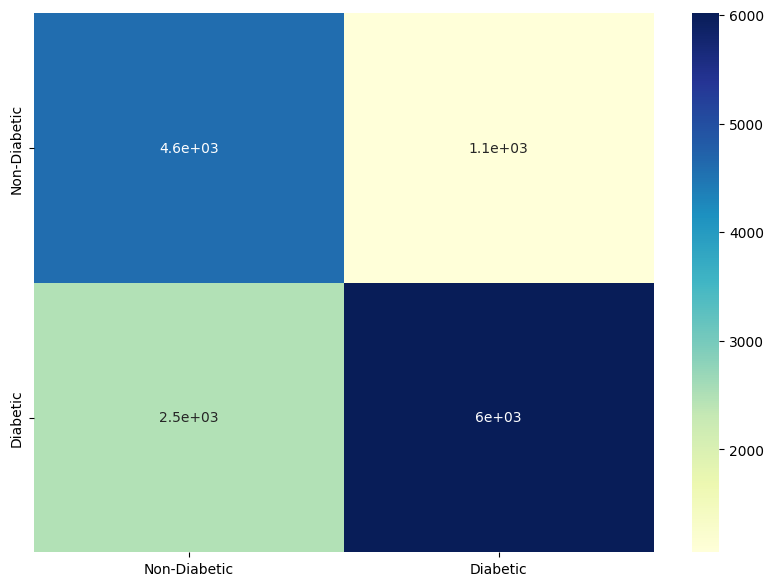

In [48]:
cm_df = pd.DataFrame(cm, index = [i for i in ['Non-Diabetic', 'Diabetic']], columns = [i for i in ['Non-Diabetic', 'Diabetic']])
plt.figure(figsize = (10,7))
sn.heatmap(cm_df,  cmap="YlGnBu", annot=True)

## Printing the ROC Curve

In [55]:
fpr, tpr, threshold = roc_curve(y_test, mlp_classifer_binary_split.predict_proba(X_test)[:,1])
roc_auc_val = roc_auc_score(y_test, mlp_classifer_binary_split.predict_proba(X_test)[:,1])

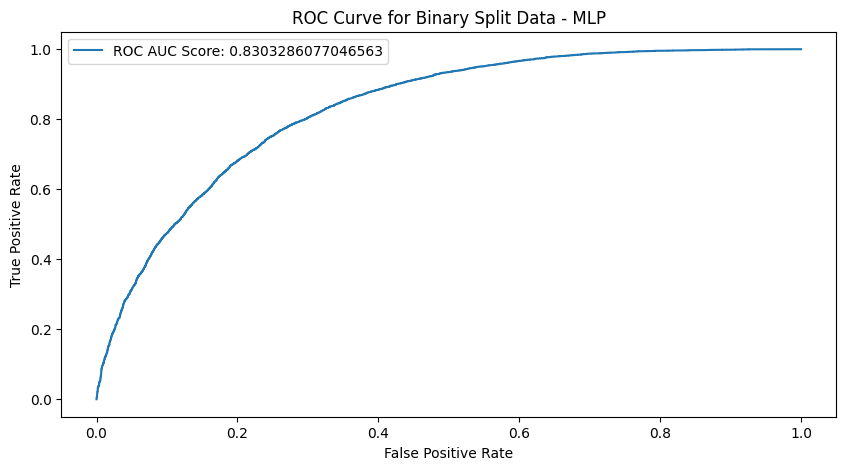

In [59]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label=f"ROC AUC Score: {roc_auc_val}")
plt.title('ROC Curve for Binary Split Data - MLP')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Training the MLP classifier using the best parameters obtained after grid search and cross validation using the PCA on training data to get the cumulative variance explained by different no. of components

In [ ]:
num_components = [3, 5, 10, 15, 20, 25]
variance = []

for num in num_components:
  # Initializing the PCA with defitive components
  pca = PCA(n_components=num)

  # Fit the PCA on the training data
  pca.fit(X_train)

  # Transform the train and test data as per the components of the PCA
  X_train_pca = pca.transform(X_train)
  X_test_pca = pca.transform(X_test)

  # Recording the explained variance for each number of components
  variance.append(np.sum(pca.explained_variance_ratio_))

  print("Cumulative variance explained by {} components is {}".format(num,variance[-1]))

  mlp_classifer = MLPClassifier(activation = 'tanh', alpha=0.01, hidden_layer_sizes=(64, 64), max_iter = 30, solver='adam', random_state= 42)
  mlp_classifer.fit(X_train_pca, y_train)
  y_pred = mlp_classifer.predict(X_test_pca)
  print(f"Classification Report for total components: {num}")
  print(classification_report(y_pred, y_test))
  print()

Cumulative variance explained by 3 components is 0.43404642271751837


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for total components: 3
              precision    recall  f1-score   support

         0.0       0.71      0.73      0.72      6899
         1.0       0.73      0.71      0.72      7240

    accuracy                           0.72     14139
   macro avg       0.72      0.72      0.72     14139
weighted avg       0.72      0.72      0.72     14139


Cumulative variance explained by 5 components is 0.6065148562363322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for total components: 5
              precision    recall  f1-score   support

         0.0       0.71      0.73      0.72      6841
         1.0       0.74      0.72      0.73      7298

    accuracy                           0.72     14139
   macro avg       0.72      0.72      0.72     14139
weighted avg       0.72      0.72      0.72     14139


Cumulative variance explained by 10 components is 0.8612429795606062


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for total components: 10
              precision    recall  f1-score   support

         0.0       0.73      0.74      0.74      6954
         1.0       0.75      0.74      0.74      7185

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139


Cumulative variance explained by 15 components is 0.9517394483608925


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for total components: 15
              precision    recall  f1-score   support

         0.0       0.70      0.78      0.73      6357
         1.0       0.80      0.72      0.76      7782

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139


Cumulative variance explained by 20 components is 0.994974739824596


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for total components: 20
              precision    recall  f1-score   support

         0.0       0.73      0.76      0.75      6836
         1.0       0.77      0.74      0.75      7303

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139


Cumulative variance explained by 25 components is 0.9999999999999996


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for total components: 25
              precision    recall  f1-score   support

         0.0       0.70      0.78      0.74      6324
         1.0       0.80      0.73      0.76      7815

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139




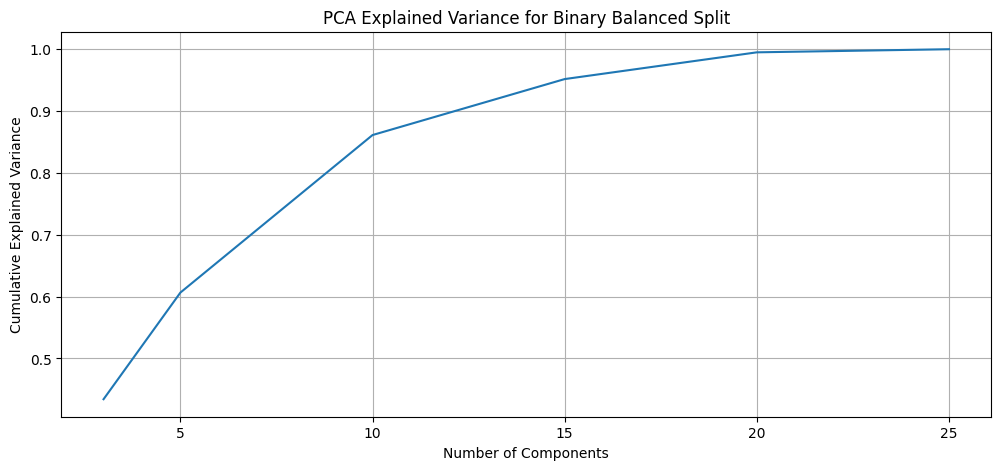

In [ ]:
### START CODE ###
plt.figure(figsize=(12,5))
plt.plot(num_components, variance)
plt.title("PCA Explained Variance for Binary Balanced Split")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
### END CODE ###

plt.show()

# Training the model for 2-Class Imbalanced Split Diabetes Data

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/AML_Final_Project/Dataset/train_binary_imbalanced_split.csv')
test_data = pd.read_csv('/content/drive/MyDrive/AML_Final_Project/Dataset/test_binary_imbalanced_split.csv')

In [ ]:
train_data.head()

,BMI,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,HighBP_0,HighBP_1,...,Veggies_1,HvyAlcoholConsump_0,HvyAlcoholConsump_1,AnyHealthcare_0,AnyHealthcare_1,NoDocbcCost_0,NoDocbcCost_1,Sex_0,Sex_1,Diabetes_binary
0,-0.057282,0.25,0.0,0.0,0.0,0.083333,0.6,0.571429,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,-0.815055,0.25,0.0,0.0,0.0,1.000000,0.6,0.857143,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.094273,0.00,0.0,0.0,0.0,0.666667,1.0,1.000000,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1.609820,0.75,0.0,0.0,0.0,0.500000,0.6,0.857143,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,-1.875938,1.00,1.0,1.0,1.0,0.500000,0.8,0.000000,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
X_train = train_data.drop(['Diabetes_binary'], axis=1)
y_train = train_data['Diabetes_binary']

In [ ]:
X_test = test_data.drop(['Diabetes_binary'], axis=1)
y_test = test_data['Diabetes_binary']

In [ ]:
mlp_classifer = MLPClassifier()
mlp_param_grid ={"hidden_layer_sizes": [(64, 64), (32, 32)],
                "activation": ['relu', 'tanh'],
                "alpha" : [0.01, 0.001],
                 "solver": ['adam'],
                "random_state": [42],
                "verbose" : [True],
                 "max_iter" : [30]}

In [ ]:
mlp_grid_search_clf = GridSearchCV(estimator=mlp_classifer, param_grid=mlp_param_grid, scoring='f1_weighted', cv=5, verbose=3)
mlp_grid_search_clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Iteration 1, loss = 0.32689652
Iteration 2, loss = 0.31662935
Iteration 3, loss = 0.31579485
Iteration 4, loss = 0.31490482
Iteration 5, loss = 0.31439419
Iteration 6, loss = 0.31412306
Iteration 7, loss = 0.31375098
Iteration 8, loss = 0.31366607
Iteration 9, loss = 0.31336558
Iteration 10, loss = 0.31318310
Iteration 11, loss = 0.31305788
Iteration 12, loss = 0.31280667
Iteration 13, loss = 0.31276024
Iteration 14, loss = 0.31261268
Iteration 15, loss = 0.31245980
Iteration 16, loss = 0.31266852
Iteration 17, loss = 0.31237476
Iteration 18, loss = 0.31233744
Iteration 19, loss = 0.31209887
Iteration 20, loss = 0.31218185
Iteration 21, loss = 0.31184974
Iteration 22, loss = 0.31196552
Iteration 23, loss = 0.31175673
Iteration 24, loss = 0.31167261
Iteration 25, loss = 0.31161650
Iteration 26, loss = 0.31155927
Iteration 27, loss = 0.31172254
Iteration 28, loss = 0.31135251
Iteration 29, loss = 0.31133899
Iteration 30, loss = 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.830 total time= 1.6min
Iteration 1, loss = 0.32646122
Iteration 2, loss = 0.31654074
Iteration 3, loss = 0.31520063
Iteration 4, loss = 0.31477557
Iteration 5, loss = 0.31401788
Iteration 6, loss = 0.31362236
Iteration 7, loss = 0.31327822
Iteration 8, loss = 0.31308721
Iteration 9, loss = 0.31272204
Iteration 10, loss = 0.31267696
Iteration 11, loss = 0.31242096
Iteration 12, loss = 0.31228919
Iteration 13, loss = 0.31213619
Iteration 14, loss = 0.31202748
Iteration 15, loss = 0.31208082
Iteration 16, loss = 0.31185649
Iteration 17, loss = 0.31177997
Iteration 18, loss = 0.31171815
Iteration 19, loss = 0.31150151
Iteration 20, loss = 0.31157540
Iteration 21, loss = 0.31132092
Iteration 22, loss = 0.31137964
Iteration 23, loss = 0.31119451
Iteration 24, loss = 0.31104441
Iteration 25, loss = 0.31111278
Iteration 26, loss = 0.31116292
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.832 total time= 1.6min
Iteration 1, loss = 0.32615399
Iteration 2, loss = 0.31577449
Iteration 3, loss = 0.31484663
Iteration 4, loss = 0.31430022
Iteration 5, loss = 0.31380902
Iteration 6, loss = 0.31333202
Iteration 7, loss = 0.31329590
Iteration 8, loss = 0.31292543
Iteration 9, loss = 0.31257510
Iteration 10, loss = 0.31241081
Iteration 11, loss = 0.31245953
Iteration 12, loss = 0.31213384
Iteration 13, loss = 0.31208789
Iteration 14, loss = 0.31201762
Iteration 15, loss = 0.31193906
Iteration 16, loss = 0.31168456
Iteration 17, loss = 0.31168746
Iteration 18, loss = 0.31150716
Iteration 19, loss = 0.31152674
Iteration 20, loss = 0.31160234
Iteration 21, loss = 0.31118446
Iteration 22, loss = 0.31151121
Iteration 23, loss = 0.31135951
Iteration 24, loss = 0.31111664
Iteration 25, loss = 0.31118760
Iteration 26, loss = 0.31111860
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.833 total time= 1.5min
Iteration 1, loss = 0.32673477
Iteration 2, loss = 0.31637380
Iteration 3, loss = 0.31541673
Iteration 4, loss = 0.31477424
Iteration 5, loss = 0.31448198
Iteration 6, loss = 0.31395087
Iteration 7, loss = 0.31393987
Iteration 8, loss = 0.31344893
Iteration 9, loss = 0.31301503
Iteration 10, loss = 0.31288308
Iteration 11, loss = 0.31289738
Iteration 12, loss = 0.31271282
Iteration 13, loss = 0.31255821
Iteration 14, loss = 0.31238608
Iteration 15, loss = 0.31222919
Iteration 16, loss = 0.31214892
Iteration 17, loss = 0.31214370
Iteration 18, loss = 0.31188827
Iteration 19, loss = 0.31206477
Iteration 20, loss = 0.31183358
Iteration 21, loss = 0.31161988
Iteration 22, loss = 0.31185792
Iteration 23, loss = 0.31160998
Iteration 24, loss = 0.31152947
Iteration 25, loss = 0.31161872
Iteration 26, loss = 0.31128238
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.837 total time= 1.5min
Iteration 1, loss = 0.32798183
Iteration 2, loss = 0.31678677
Iteration 3, loss = 0.31562970
Iteration 4, loss = 0.31502791
Iteration 5, loss = 0.31443939
Iteration 6, loss = 0.31407720
Iteration 7, loss = 0.31389794
Iteration 8, loss = 0.31356617
Iteration 9, loss = 0.31343755
Iteration 10, loss = 0.31335855
Iteration 11, loss = 0.31322417
Iteration 12, loss = 0.31296343
Iteration 13, loss = 0.31290682
Iteration 14, loss = 0.31270867
Iteration 15, loss = 0.31272348
Iteration 16, loss = 0.31263040
Iteration 17, loss = 0.31241870
Iteration 18, loss = 0.31254470
Iteration 19, loss = 0.31223948
Iteration 20, loss = 0.31222194
Iteration 21, loss = 0.31209110
Iteration 22, loss = 0.31198601
Iteration 23, loss = 0.31201145
Iteration 24, loss = 0.31189007
Iteration 25, loss = 0.31162335
Iteration 26, loss = 0.31180779
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.01, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.834 total time= 1.5min
Iteration 1, loss = 0.33210227
Iteration 2, loss = 0.31668962
Iteration 3, loss = 0.31547848
Iteration 4, loss = 0.31472076
Iteration 5, loss = 0.31460916
Iteration 6, loss = 0.31417697
Iteration 7, loss = 0.31391150
Iteration 8, loss = 0.31356820
Iteration 9, loss = 0.31357476
Iteration 10, loss = 0.31336259
Iteration 11, loss = 0.31309024
Iteration 12, loss = 0.31308946
Iteration 13, loss = 0.31308153
Iteration 14, loss = 0.31279798
Iteration 15, loss = 0.31278523
Iteration 16, loss = 0.31276150
Iteration 17, loss = 0.31256714
Iteration 18, loss = 0.31240939
Iteration 19, loss = 0.31247560
Iteration 20, loss = 0.31226055
Iteration 21, loss = 0.31215862
Iteration 22, loss = 0.31226737
Iteration 23, loss = 0.31204424
Iteration 24, loss = 0.31205833
Iteration 25, loss = 0.31191359
Iteration 26, loss = 0.31194138
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.33097532
Iteration 2, loss = 0.31618853
Iteration 3, loss = 0.31482008
Iteration 4, loss = 0.31433996
Iteration 5, loss = 0.31405929
Iteration 6, loss = 0.31363830
Iteration 7, loss = 0.31335888
Iteration 8, loss = 0.31312641
Iteration 9, loss = 0.31305161
Iteration 10, loss = 0.31299853
Iteration 11, loss = 0.31261335
Iteration 12, loss = 0.31251110
Iteration 13, loss = 0.31251371
Iteration 14, loss = 0.31226851
Iteration 15, loss = 0.31216820
Iteration 16, loss = 0.31222300
Iteration 17, loss = 0.31192010
Iteration 18, loss = 0.31187556
Iteration 19, loss = 0.31191270
Iteration 20, loss = 0.31178797
Iteration 21, loss = 0.31161848
Iteration 22, loss = 0.31167564
Iteration 23, loss = 0.31160720
Iteration 24, loss = 0.31148271
Iteration 25, loss = 0.31135606
Iteration 26, loss = 0.31132517
Iteration 27, loss = 0.31137040
Iteration 28, loss = 0.31130890
Iteration 29, loss = 0.31133666
Iteration 30, loss = 0.31125994
[CV 2/5] END activation=relu, alpha=0.01, hidden_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.33080342
Iteration 2, loss = 0.31596242
Iteration 3, loss = 0.31459344
Iteration 4, loss = 0.31391547
Iteration 5, loss = 0.31363260
Iteration 6, loss = 0.31326043
Iteration 7, loss = 0.31295478
Iteration 8, loss = 0.31271479
Iteration 9, loss = 0.31266492
Iteration 10, loss = 0.31236700
Iteration 11, loss = 0.31231746
Iteration 12, loss = 0.31225360
Iteration 13, loss = 0.31219042
Iteration 14, loss = 0.31208996
Iteration 15, loss = 0.31194974
Iteration 16, loss = 0.31205864
Iteration 17, loss = 0.31164866
Iteration 18, loss = 0.31180542
Iteration 19, loss = 0.31162986
Iteration 20, loss = 0.31156380
Iteration 21, loss = 0.31141710
Iteration 22, loss = 0.31152797
Iteration 23, loss = 0.31152333
Iteration 24, loss = 0.31131271
Iteration 25, loss = 0.31129789
Iteration 26, loss = 0.31126771
Iteration 27, loss = 0.31130371
Iteration 28, loss = 0.31118623
Iteration 29, loss = 0.31136670
Iteration 30, loss = 0.31105014
[CV 3/5] END activation=relu, alpha=0.01, hidden_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.33193373
Iteration 2, loss = 0.31647073
Iteration 3, loss = 0.31506346
Iteration 4, loss = 0.31471564
Iteration 5, loss = 0.31425722
Iteration 6, loss = 0.31403015
Iteration 7, loss = 0.31354452
Iteration 8, loss = 0.31346998
Iteration 9, loss = 0.31313315
Iteration 10, loss = 0.31299958
Iteration 11, loss = 0.31289099
Iteration 12, loss = 0.31295396
Iteration 13, loss = 0.31268823
Iteration 14, loss = 0.31262222
Iteration 15, loss = 0.31256348
Iteration 16, loss = 0.31240477
Iteration 17, loss = 0.31218939
Iteration 18, loss = 0.31229835
Iteration 19, loss = 0.31212012
Iteration 20, loss = 0.31204707
Iteration 21, loss = 0.31188987
Iteration 22, loss = 0.31187397
Iteration 23, loss = 0.31192905
Iteration 24, loss = 0.31164608
Iteration 25, loss = 0.31171574
Iteration 26, loss = 0.31176022
Iteration 27, loss = 0.31171220
Iteration 28, loss = 0.31147922
Iteration 29, loss = 0.31155720
Iteration 30, loss = 0.31132404
[CV 4/5] END activation=relu, alpha=0.01, hidden_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.33210872
Iteration 2, loss = 0.31668750
Iteration 3, loss = 0.31554338
Iteration 4, loss = 0.31503108
Iteration 5, loss = 0.31445261
Iteration 6, loss = 0.31422657
Iteration 7, loss = 0.31387342
Iteration 8, loss = 0.31360911
Iteration 9, loss = 0.31358547
Iteration 10, loss = 0.31330161
Iteration 11, loss = 0.31346711
Iteration 12, loss = 0.31317469
Iteration 13, loss = 0.31301344
Iteration 14, loss = 0.31303696
Iteration 15, loss = 0.31287115
Iteration 16, loss = 0.31282960
Iteration 17, loss = 0.31263009
Iteration 18, loss = 0.31253624
Iteration 19, loss = 0.31254968
Iteration 20, loss = 0.31244197
Iteration 21, loss = 0.31219292
Iteration 22, loss = 0.31238295
Iteration 23, loss = 0.31242066
Iteration 24, loss = 0.31214033
Iteration 25, loss = 0.31212233
Iteration 26, loss = 0.31218485
Iteration 27, loss = 0.31191172
Iteration 28, loss = 0.31193419
Iteration 29, loss = 0.31183221
Iteration 30, loss = 0.31187182
[CV 5/5] END activation=relu, alpha=0.01, hidden_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.32468312
Iteration 2, loss = 0.31474529
Iteration 3, loss = 0.31396591
Iteration 4, loss = 0.31320810
Iteration 5, loss = 0.31267368
Iteration 6, loss = 0.31241003
Iteration 7, loss = 0.31201693
Iteration 8, loss = 0.31192038
Iteration 9, loss = 0.31156974
Iteration 10, loss = 0.31132449
Iteration 11, loss = 0.31113948
Iteration 12, loss = 0.31087554
Iteration 13, loss = 0.31069985
Iteration 14, loss = 0.31047395
Iteration 15, loss = 0.31018263
Iteration 16, loss = 0.31038724
Iteration 17, loss = 0.30994946
Iteration 18, loss = 0.30988406
Iteration 19, loss = 0.30955312
Iteration 20, loss = 0.30946055
Iteration 21, loss = 0.30898497
Iteration 22, loss = 0.30900389
Iteration 23, loss = 0.30862718
Iteration 24, loss = 0.30847725
Iteration 25, loss = 0.30825226
Iteration 26, loss = 0.30808062
Iteration 27, loss = 0.30816245
Iteration 28, loss = 0.30777298
Iteration 29, loss = 0.30747802
Iteration 30, loss = 0.30722148
[CV 1/5] END activation=relu, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.32419328
Iteration 2, loss = 0.31449637
Iteration 3, loss = 0.31330632
Iteration 4, loss = 0.31294295
Iteration 5, loss = 0.31222912
Iteration 6, loss = 0.31181007
Iteration 7, loss = 0.31146090
Iteration 8, loss = 0.31129700
Iteration 9, loss = 0.31094584
Iteration 10, loss = 0.31068515
Iteration 11, loss = 0.31038831
Iteration 12, loss = 0.31013965
Iteration 13, loss = 0.30987392
Iteration 14, loss = 0.30965522
Iteration 15, loss = 0.30969811
Iteration 16, loss = 0.30931100
Iteration 17, loss = 0.30912480
Iteration 18, loss = 0.30896925
Iteration 19, loss = 0.30868255
Iteration 20, loss = 0.30852263
Iteration 21, loss = 0.30826954
Iteration 22, loss = 0.30815403
Iteration 23, loss = 0.30795712
Iteration 24, loss = 0.30762692
Iteration 25, loss = 0.30763404
Iteration 26, loss = 0.30752823
Iteration 27, loss = 0.30709694
Iteration 28, loss = 0.30689751
Iteration 29, loss = 0.30673291
Iteration 30, loss = 0.30654573


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.833 total time= 1.3min
Iteration 1, loss = 0.32390593
Iteration 2, loss = 0.31372172
Iteration 3, loss = 0.31287169
Iteration 4, loss = 0.31251843
Iteration 5, loss = 0.31207169
Iteration 6, loss = 0.31167963
Iteration 7, loss = 0.31158912
Iteration 8, loss = 0.31117458
Iteration 9, loss = 0.31082788
Iteration 10, loss = 0.31062216
Iteration 11, loss = 0.31061194
Iteration 12, loss = 0.31022115
Iteration 13, loss = 0.31005433
Iteration 14, loss = 0.30990635
Iteration 15, loss = 0.30979433
Iteration 16, loss = 0.30938969
Iteration 17, loss = 0.30928735
Iteration 18, loss = 0.30902814
Iteration 19, loss = 0.30897433
Iteration 20, loss = 0.30885675
Iteration 21, loss = 0.30835044
Iteration 22, loss = 0.30852030
Iteration 23, loss = 0.30828988
Iteration 24, loss = 0.30786842
Iteration 25, loss = 0.30777156
Iteration 26, loss = 0.30750701
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.832 total time= 1.4min
Iteration 1, loss = 0.32447081
Iteration 2, loss = 0.31442008
Iteration 3, loss = 0.31357599
Iteration 4, loss = 0.31302358
Iteration 5, loss = 0.31274987
Iteration 6, loss = 0.31224773
Iteration 7, loss = 0.31229639
Iteration 8, loss = 0.31179240
Iteration 9, loss = 0.31130426
Iteration 10, loss = 0.31116762
Iteration 11, loss = 0.31116225
Iteration 12, loss = 0.31090174
Iteration 13, loss = 0.31070378
Iteration 14, loss = 0.31039513
Iteration 15, loss = 0.31006337
Iteration 16, loss = 0.31000466
Iteration 17, loss = 0.30989943
Iteration 18, loss = 0.30952531
Iteration 19, loss = 0.30947678
Iteration 20, loss = 0.30916148
Iteration 21, loss = 0.30886531
Iteration 22, loss = 0.30889853
Iteration 23, loss = 0.30862963
Iteration 24, loss = 0.30836906
Iteration 25, loss = 0.30838470
Iteration 26, loss = 0.30790629
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.834 total time= 1.3min
Iteration 1, loss = 0.32579291
Iteration 2, loss = 0.31481863
Iteration 3, loss = 0.31381036
Iteration 4, loss = 0.31328290
Iteration 5, loss = 0.31279211
Iteration 6, loss = 0.31240089
Iteration 7, loss = 0.31221943
Iteration 8, loss = 0.31177685
Iteration 9, loss = 0.31160420
Iteration 10, loss = 0.31141659
Iteration 11, loss = 0.31132264
Iteration 12, loss = 0.31091090
Iteration 13, loss = 0.31076716
Iteration 14, loss = 0.31049598
Iteration 15, loss = 0.31045529
Iteration 16, loss = 0.31017747
Iteration 17, loss = 0.30986638
Iteration 18, loss = 0.30983406
Iteration 19, loss = 0.30951307
Iteration 20, loss = 0.30944145
Iteration 21, loss = 0.30914198
Iteration 22, loss = 0.30891303
Iteration 23, loss = 0.30889397
Iteration 24, loss = 0.30863976
Iteration 25, loss = 0.30838805
Iteration 26, loss = 0.30839525
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.837 total time= 1.2min
Iteration 1, loss = 0.33076632
Iteration 2, loss = 0.31536328
Iteration 3, loss = 0.31416670
Iteration 4, loss = 0.31340444
Iteration 5, loss = 0.31327833
Iteration 6, loss = 0.31292094
Iteration 7, loss = 0.31265325
Iteration 8, loss = 0.31231588
Iteration 9, loss = 0.31223358
Iteration 10, loss = 0.31209174
Iteration 11, loss = 0.31175821
Iteration 12, loss = 0.31170313
Iteration 13, loss = 0.31172889
Iteration 14, loss = 0.31143942
Iteration 15, loss = 0.31132699
Iteration 16, loss = 0.31130869
Iteration 17, loss = 0.31104027
Iteration 18, loss = 0.31091464
Iteration 19, loss = 0.31101159
Iteration 20, loss = 0.31077715
Iteration 21, loss = 0.31064202
Iteration 22, loss = 0.31067840
Iteration 23, loss = 0.31048534
Iteration 24, loss = 0.31044576
Iteration 25, loss = 0.31015465
Iteration 26, loss = 0.31028313
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.32960817
Iteration 2, loss = 0.31485647
Iteration 3, loss = 0.31348535
Iteration 4, loss = 0.31303948
Iteration 5, loss = 0.31270691
Iteration 6, loss = 0.31235062
Iteration 7, loss = 0.31211483
Iteration 8, loss = 0.31187910
Iteration 9, loss = 0.31179770
Iteration 10, loss = 0.31169348
Iteration 11, loss = 0.31134192
Iteration 12, loss = 0.31114228
Iteration 13, loss = 0.31112109
Iteration 14, loss = 0.31087703
Iteration 15, loss = 0.31073515
Iteration 16, loss = 0.31075892
Iteration 17, loss = 0.31037228
Iteration 18, loss = 0.31035048
Iteration 19, loss = 0.31037343
Iteration 20, loss = 0.31018839
Iteration 21, loss = 0.30985912
Iteration 22, loss = 0.30988551
Iteration 23, loss = 0.30980909
Iteration 24, loss = 0.30963739
Iteration 25, loss = 0.30943886
Iteration 26, loss = 0.30937953
Iteration 27, loss = 0.30940998
Iteration 28, loss = 0.30934528
Iteration 29, loss = 0.30921229
Iteration 30, loss = 0.30918599
[CV 2/5] END activation=relu, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.32960582
Iteration 2, loss = 0.31473310
Iteration 3, loss = 0.31338583
Iteration 4, loss = 0.31266879
Iteration 5, loss = 0.31246582
Iteration 6, loss = 0.31208905
Iteration 7, loss = 0.31176658
Iteration 8, loss = 0.31156459
Iteration 9, loss = 0.31148276
Iteration 10, loss = 0.31118552
Iteration 11, loss = 0.31107160
Iteration 12, loss = 0.31098210
Iteration 13, loss = 0.31093110
Iteration 14, loss = 0.31079223
Iteration 15, loss = 0.31056022
Iteration 16, loss = 0.31068179
Iteration 17, loss = 0.31022530
Iteration 18, loss = 0.31033379
Iteration 19, loss = 0.31016051
Iteration 20, loss = 0.31011723
Iteration 21, loss = 0.30995887
Iteration 22, loss = 0.30991840
Iteration 23, loss = 0.30993624
Iteration 24, loss = 0.30969560
Iteration 25, loss = 0.30962150
Iteration 26, loss = 0.30965079
Iteration 27, loss = 0.30951692
Iteration 28, loss = 0.30939819
Iteration 29, loss = 0.30951557
Iteration 30, loss = 0.30919421
[CV 3/5] END activation=relu, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.33063722
Iteration 2, loss = 0.31502121
Iteration 3, loss = 0.31373571
Iteration 4, loss = 0.31335762
Iteration 5, loss = 0.31297162
Iteration 6, loss = 0.31275836
Iteration 7, loss = 0.31231260
Iteration 8, loss = 0.31222123
Iteration 9, loss = 0.31192867
Iteration 10, loss = 0.31178204
Iteration 11, loss = 0.31165449
Iteration 12, loss = 0.31168406
Iteration 13, loss = 0.31146680
Iteration 14, loss = 0.31132748
Iteration 15, loss = 0.31123251
Iteration 16, loss = 0.31111362
Iteration 17, loss = 0.31083615
Iteration 18, loss = 0.31090807
Iteration 19, loss = 0.31075469
Iteration 20, loss = 0.31063623
Iteration 21, loss = 0.31050865
Iteration 22, loss = 0.31045903
Iteration 23, loss = 0.31044754
Iteration 24, loss = 0.31017745
Iteration 25, loss = 0.31016190
Iteration 26, loss = 0.31022952
Iteration 27, loss = 0.31005101
Iteration 28, loss = 0.30985014
Iteration 29, loss = 0.30993234
Iteration 30, loss = 0.30956991
[CV 4/5] END activation=relu, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.33057514
Iteration 2, loss = 0.31530283
Iteration 3, loss = 0.31418417
Iteration 4, loss = 0.31370794
Iteration 5, loss = 0.31312188
Iteration 6, loss = 0.31287294
Iteration 7, loss = 0.31247010
Iteration 8, loss = 0.31228691
Iteration 9, loss = 0.31218514
Iteration 10, loss = 0.31193523
Iteration 11, loss = 0.31208357
Iteration 12, loss = 0.31178198
Iteration 13, loss = 0.31163993
Iteration 14, loss = 0.31164774
Iteration 15, loss = 0.31141744
Iteration 16, loss = 0.31137301
Iteration 17, loss = 0.31117463
Iteration 18, loss = 0.31110900
Iteration 19, loss = 0.31103679
Iteration 20, loss = 0.31102579
Iteration 21, loss = 0.31071626
Iteration 22, loss = 0.31084655
Iteration 23, loss = 0.31086691
Iteration 24, loss = 0.31052302
Iteration 25, loss = 0.31048608
Iteration 26, loss = 0.31053617
Iteration 27, loss = 0.31022488
Iteration 28, loss = 0.31022199
Iteration 29, loss = 0.31014176
Iteration 30, loss = 0.30998549
[CV 5/5] END activation=relu, alpha=0.001, hidden

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.32697092
Iteration 2, loss = 0.31867415
Iteration 3, loss = 0.31765238
Iteration 4, loss = 0.31672777
Iteration 5, loss = 0.31601616
Iteration 6, loss = 0.31571740
Iteration 7, loss = 0.31537233
Iteration 8, loss = 0.31532670
Iteration 9, loss = 0.31489249
Iteration 10, loss = 0.31479445
Iteration 11, loss = 0.31465926
Iteration 12, loss = 0.31445386
Iteration 13, loss = 0.31427951
Iteration 14, loss = 0.31424833
Iteration 15, loss = 0.31408712
Iteration 16, loss = 0.31428313
Iteration 17, loss = 0.31400375
Iteration 18, loss = 0.31402303
Iteration 19, loss = 0.31375510
Iteration 20, loss = 0.31399254
Iteration 21, loss = 0.31351729
Iteration 22, loss = 0.31365978
Iteration 23, loss = 0.31348167
Iteration 24, loss = 0.31349637
Iteration 25, loss = 0.31340323
Iteration 26, loss = 0.31336679
Iteration 27, loss = 0.31352153
Iteration 28, loss = 0.31331948
Iteration 29, loss = 0.31326630
Iteration 30, loss = 0.31311361


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.830 total time= 2.2min
Iteration 1, loss = 0.32631894
Iteration 2, loss = 0.31843235
Iteration 3, loss = 0.31698223
Iteration 4, loss = 0.31651724
Iteration 5, loss = 0.31563430
Iteration 6, loss = 0.31533209
Iteration 7, loss = 0.31497097
Iteration 8, loss = 0.31482604
Iteration 9, loss = 0.31445327
Iteration 10, loss = 0.31441315
Iteration 11, loss = 0.31413759
Iteration 12, loss = 0.31399892
Iteration 13, loss = 0.31383232
Iteration 14, loss = 0.31363436
Iteration 15, loss = 0.31388675
Iteration 16, loss = 0.31352716
Iteration 17, loss = 0.31351801
Iteration 18, loss = 0.31351702
Iteration 19, loss = 0.31322169
Iteration 20, loss = 0.31341882
Iteration 21, loss = 0.31308501
Iteration 22, loss = 0.31322057
Iteration 23, loss = 0.31316455
Iteration 24, loss = 0.31304326
Iteration 25, loss = 0.31308604
Iteration 26, loss = 0.31309272
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.832 total time= 2.2min
Iteration 1, loss = 0.32613086
Iteration 2, loss = 0.31796219
Iteration 3, loss = 0.31653109
Iteration 4, loss = 0.31603607
Iteration 5, loss = 0.31551488
Iteration 6, loss = 0.31479727
Iteration 7, loss = 0.31485651
Iteration 8, loss = 0.31457460
Iteration 9, loss = 0.31408682
Iteration 10, loss = 0.31397232
Iteration 11, loss = 0.31400913
Iteration 12, loss = 0.31367757
Iteration 13, loss = 0.31363502
Iteration 14, loss = 0.31357709
Iteration 15, loss = 0.31346225
Iteration 16, loss = 0.31310923
Iteration 17, loss = 0.31311496
Iteration 18, loss = 0.31310577
Iteration 19, loss = 0.31305254
Iteration 20, loss = 0.31315261
Iteration 21, loss = 0.31276538
Iteration 22, loss = 0.31311627
Iteration 23, loss = 0.31308295
Iteration 24, loss = 0.31280085
Iteration 25, loss = 0.31280517
Iteration 26, loss = 0.31269985
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.827 total time= 2.2min
Iteration 1, loss = 0.32674358
Iteration 2, loss = 0.31858971
Iteration 3, loss = 0.31724529
Iteration 4, loss = 0.31635296
Iteration 5, loss = 0.31605475
Iteration 6, loss = 0.31551852
Iteration 7, loss = 0.31555659
Iteration 8, loss = 0.31512878
Iteration 9, loss = 0.31458250
Iteration 10, loss = 0.31437566
Iteration 11, loss = 0.31451213
Iteration 12, loss = 0.31426131
Iteration 13, loss = 0.31419211
Iteration 14, loss = 0.31392860
Iteration 15, loss = 0.31379791
Iteration 16, loss = 0.31368648
Iteration 17, loss = 0.31368162
Iteration 18, loss = 0.31343072
Iteration 19, loss = 0.31369632
Iteration 20, loss = 0.31350787
Iteration 21, loss = 0.31321674
Iteration 22, loss = 0.31344577
Iteration 23, loss = 0.31337301
Iteration 24, loss = 0.31313453
Iteration 25, loss = 0.31329239
Iteration 26, loss = 0.31302779
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.830 total time= 2.1min
Iteration 1, loss = 0.32767086
Iteration 2, loss = 0.31914096
Iteration 3, loss = 0.31742553
Iteration 4, loss = 0.31669321
Iteration 5, loss = 0.31608088
Iteration 6, loss = 0.31571887
Iteration 7, loss = 0.31543823
Iteration 8, loss = 0.31510046
Iteration 9, loss = 0.31513527
Iteration 10, loss = 0.31497305
Iteration 11, loss = 0.31477104
Iteration 12, loss = 0.31450975
Iteration 13, loss = 0.31442705
Iteration 14, loss = 0.31427933
Iteration 15, loss = 0.31432745
Iteration 16, loss = 0.31413880
Iteration 17, loss = 0.31399153
Iteration 18, loss = 0.31411406
Iteration 19, loss = 0.31381474
Iteration 20, loss = 0.31384598
Iteration 21, loss = 0.31385880
Iteration 22, loss = 0.31366634
Iteration 23, loss = 0.31374795
Iteration 24, loss = 0.31360099
Iteration 25, loss = 0.31334309
Iteration 26, loss = 0.31362858
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.838 total time= 2.1min
Iteration 1, loss = 0.33015896
Iteration 2, loss = 0.31761710
Iteration 3, loss = 0.31642520
Iteration 4, loss = 0.31574259
Iteration 5, loss = 0.31567986
Iteration 6, loss = 0.31521517
Iteration 7, loss = 0.31489024
Iteration 8, loss = 0.31465535
Iteration 9, loss = 0.31468644
Iteration 10, loss = 0.31447936
Iteration 11, loss = 0.31411933
Iteration 12, loss = 0.31417762
Iteration 13, loss = 0.31409334
Iteration 14, loss = 0.31375161
Iteration 15, loss = 0.31380610
Iteration 16, loss = 0.31378127
Iteration 17, loss = 0.31362753
Iteration 18, loss = 0.31346758
Iteration 19, loss = 0.31360355
Iteration 20, loss = 0.31337507
Iteration 21, loss = 0.31327785
Iteration 22, loss = 0.31342886
Iteration 23, loss = 0.31320788
Iteration 24, loss = 0.31322864
Iteration 25, loss = 0.31305343
Iteration 26, loss = 0.31309221
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.832 total time=  47.1s
Iteration 1, loss = 0.32964453
Iteration 2, loss = 0.31720867
Iteration 3, loss = 0.31574510
Iteration 4, loss = 0.31541741
Iteration 5, loss = 0.31509249
Iteration 6, loss = 0.31472131
Iteration 7, loss = 0.31438619
Iteration 8, loss = 0.31415945
Iteration 9, loss = 0.31418215
Iteration 10, loss = 0.31406095
Iteration 11, loss = 0.31361340
Iteration 12, loss = 0.31355809
Iteration 13, loss = 0.31354232
Iteration 14, loss = 0.31325271
Iteration 15, loss = 0.31326997
Iteration 16, loss = 0.31330359
Iteration 17, loss = 0.31298984
Iteration 18, loss = 0.31299556
Iteration 19, loss = 0.31297194
Iteration 20, loss = 0.31297894
Iteration 21, loss = 0.31271833
Iteration 22, loss = 0.31274243
Iteration 23, loss = 0.31267820
Iteration 24, loss = 0.31256450
Iteration 25, loss = 0.31249442
Iteration 26, loss = 0.31241002
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.826 total time=  47.4s
Iteration 1, loss = 0.32935194
Iteration 2, loss = 0.31685954
Iteration 3, loss = 0.31550931
Iteration 4, loss = 0.31498341
Iteration 5, loss = 0.31475988
Iteration 6, loss = 0.31444252
Iteration 7, loss = 0.31414301
Iteration 8, loss = 0.31385703
Iteration 9, loss = 0.31379133
Iteration 10, loss = 0.31356296
Iteration 11, loss = 0.31335486
Iteration 12, loss = 0.31337963
Iteration 13, loss = 0.31322554
Iteration 14, loss = 0.31318993
Iteration 15, loss = 0.31296703
Iteration 16, loss = 0.31315571
Iteration 17, loss = 0.31273234
Iteration 18, loss = 0.31291283
Iteration 19, loss = 0.31272727
Iteration 20, loss = 0.31267133
Iteration 21, loss = 0.31252813
Iteration 22, loss = 0.31250711
Iteration 23, loss = 0.31260642
Iteration 24, loss = 0.31243522
Iteration 25, loss = 0.31234024
Iteration 26, loss = 0.31236511
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.824 total time=  48.0s
Iteration 1, loss = 0.33004604
Iteration 2, loss = 0.31730563
Iteration 3, loss = 0.31600449
Iteration 4, loss = 0.31566527
Iteration 5, loss = 0.31522077
Iteration 6, loss = 0.31511524
Iteration 7, loss = 0.31459728
Iteration 8, loss = 0.31448405
Iteration 9, loss = 0.31419189
Iteration 10, loss = 0.31412642
Iteration 11, loss = 0.31401776
Iteration 12, loss = 0.31403969
Iteration 13, loss = 0.31373724
Iteration 14, loss = 0.31368703
Iteration 15, loss = 0.31365270
Iteration 16, loss = 0.31350185
Iteration 17, loss = 0.31327723
Iteration 18, loss = 0.31334812
Iteration 19, loss = 0.31317476
Iteration 20, loss = 0.31320034
Iteration 21, loss = 0.31299134
Iteration 22, loss = 0.31305530
Iteration 23, loss = 0.31314672
Iteration 24, loss = 0.31290446
Iteration 25, loss = 0.31294468
Iteration 26, loss = 0.31304082
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.829 total time=  48.3s
Iteration 1, loss = 0.33036233
Iteration 2, loss = 0.31764507
Iteration 3, loss = 0.31650887
Iteration 4, loss = 0.31607263
Iteration 5, loss = 0.31543932
Iteration 6, loss = 0.31522696
Iteration 7, loss = 0.31484108
Iteration 8, loss = 0.31459901
Iteration 9, loss = 0.31458781
Iteration 10, loss = 0.31423871
Iteration 11, loss = 0.31438303
Iteration 12, loss = 0.31407979
Iteration 13, loss = 0.31391823
Iteration 14, loss = 0.31390886
Iteration 15, loss = 0.31378004
Iteration 16, loss = 0.31373658
Iteration 17, loss = 0.31354890
Iteration 18, loss = 0.31351031
Iteration 19, loss = 0.31343292
Iteration 20, loss = 0.31342365
Iteration 21, loss = 0.31324918
Iteration 22, loss = 0.31337493
Iteration 23, loss = 0.31346497
Iteration 24, loss = 0.31312167
Iteration 25, loss = 0.31318175
Iteration 26, loss = 0.31315384
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(32, 32), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.838 total time=  47.2s
Iteration 1, loss = 0.32441017
Iteration 2, loss = 0.31614651
Iteration 3, loss = 0.31517321
Iteration 4, loss = 0.31428349
Iteration 5, loss = 0.31364032
Iteration 6, loss = 0.31340877
Iteration 7, loss = 0.31308248
Iteration 8, loss = 0.31307155
Iteration 9, loss = 0.31263797
Iteration 10, loss = 0.31252811
Iteration 11, loss = 0.31239545
Iteration 12, loss = 0.31220603
Iteration 13, loss = 0.31200995
Iteration 14, loss = 0.31193997
Iteration 15, loss = 0.31176248
Iteration 16, loss = 0.31193090
Iteration 17, loss = 0.31163703
Iteration 18, loss = 0.31158430
Iteration 19, loss = 0.31134104
Iteration 20, loss = 0.31145162
Iteration 21, loss = 0.31095263
Iteration 22, loss = 0.31103770
Iteration 23, loss = 0.31082514
Iteration 24, loss = 0.31074703
Iteration 25, loss = 0.31063243
Iteration 26, loss = 0.31055551
Iteration 27, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.830 total time= 2.1min
Iteration 1, loss = 0.32376358
Iteration 2, loss = 0.31591961
Iteration 3, loss = 0.31452201
Iteration 4, loss = 0.31411405
Iteration 5, loss = 0.31329660
Iteration 6, loss = 0.31303370
Iteration 7, loss = 0.31272027
Iteration 8, loss = 0.31258840
Iteration 9, loss = 0.31223069
Iteration 10, loss = 0.31216963
Iteration 11, loss = 0.31190326
Iteration 12, loss = 0.31176128
Iteration 13, loss = 0.31157037
Iteration 14, loss = 0.31137635
Iteration 15, loss = 0.31157724
Iteration 16, loss = 0.31121235
Iteration 17, loss = 0.31117683
Iteration 18, loss = 0.31110787
Iteration 19, loss = 0.31081755
Iteration 20, loss = 0.31094425
Iteration 21, loss = 0.31058491
Iteration 22, loss = 0.31064140
Iteration 23, loss = 0.31048946
Iteration 24, loss = 0.31034250
Iteration 25, loss = 0.31032431
Iteration 26, loss = 0.31033091
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.833 total time= 2.2min
Iteration 1, loss = 0.32357085
Iteration 2, loss = 0.31542821
Iteration 3, loss = 0.31405191
Iteration 4, loss = 0.31362004
Iteration 5, loss = 0.31314567
Iteration 6, loss = 0.31250652
Iteration 7, loss = 0.31259068
Iteration 8, loss = 0.31234984
Iteration 9, loss = 0.31189169
Iteration 10, loss = 0.31180351
Iteration 11, loss = 0.31185910
Iteration 12, loss = 0.31153596
Iteration 13, loss = 0.31148590
Iteration 14, loss = 0.31141102
Iteration 15, loss = 0.31125245
Iteration 16, loss = 0.31091276
Iteration 17, loss = 0.31091084
Iteration 18, loss = 0.31084325
Iteration 19, loss = 0.31076876
Iteration 20, loss = 0.31077669
Iteration 21, loss = 0.31034307
Iteration 22, loss = 0.31063815
Iteration 23, loss = 0.31051510
Iteration 24, loss = 0.31023503
Iteration 25, loss = 0.31017850
Iteration 26, loss = 0.31005112
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.830 total time= 2.1min
Iteration 1, loss = 0.32418465
Iteration 2, loss = 0.31605600
Iteration 3, loss = 0.31476836
Iteration 4, loss = 0.31394660
Iteration 5, loss = 0.31369605
Iteration 6, loss = 0.31320863
Iteration 7, loss = 0.31328405
Iteration 8, loss = 0.31286378
Iteration 9, loss = 0.31232966
Iteration 10, loss = 0.31216436
Iteration 11, loss = 0.31230003
Iteration 12, loss = 0.31205610
Iteration 13, loss = 0.31198717
Iteration 14, loss = 0.31165645
Iteration 15, loss = 0.31151789
Iteration 16, loss = 0.31139051
Iteration 17, loss = 0.31138886
Iteration 18, loss = 0.31109765
Iteration 19, loss = 0.31130049
Iteration 20, loss = 0.31101651
Iteration 21, loss = 0.31075209
Iteration 22, loss = 0.31086817
Iteration 23, loss = 0.31075598
Iteration 24, loss = 0.31053156
Iteration 25, loss = 0.31062367
Iteration 26, loss = 0.31025074
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.833 total time= 2.1min
Iteration 1, loss = 0.32511366
Iteration 2, loss = 0.31661006
Iteration 3, loss = 0.31496021
Iteration 4, loss = 0.31429116
Iteration 5, loss = 0.31372937
Iteration 6, loss = 0.31341587
Iteration 7, loss = 0.31317124
Iteration 8, loss = 0.31284402
Iteration 9, loss = 0.31288603
Iteration 10, loss = 0.31272862
Iteration 11, loss = 0.31257186
Iteration 12, loss = 0.31226015
Iteration 13, loss = 0.31218506
Iteration 14, loss = 0.31201687
Iteration 15, loss = 0.31202845
Iteration 16, loss = 0.31181619
Iteration 17, loss = 0.31162736
Iteration 18, loss = 0.31169539
Iteration 19, loss = 0.31136543
Iteration 20, loss = 0.31131055
Iteration 21, loss = 0.31130976
Iteration 22, loss = 0.31107317
Iteration 23, loss = 0.31105554
Iteration 24, loss = 0.31089608
Iteration 25, loss = 0.31059257
Iteration 26, loss = 0.31077746
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(64, 64), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.838 total time= 2.2min
Iteration 1, loss = 0.32854969
Iteration 2, loss = 0.31597579
Iteration 3, loss = 0.31479158
Iteration 4, loss = 0.31411389
Iteration 5, loss = 0.31405318
Iteration 6, loss = 0.31361216
Iteration 7, loss = 0.31328865
Iteration 8, loss = 0.31303239
Iteration 9, loss = 0.31305584
Iteration 10, loss = 0.31284584
Iteration 11, loss = 0.31249426
Iteration 12, loss = 0.31248773
Iteration 13, loss = 0.31240082
Iteration 14, loss = 0.31204388
Iteration 15, loss = 0.31206499
Iteration 16, loss = 0.31201548
Iteration 17, loss = 0.31183524
Iteration 18, loss = 0.31167224
Iteration 19, loss = 0.31177343
Iteration 20, loss = 0.31153338
Iteration 21, loss = 0.31138962
Iteration 22, loss = 0.31152370
Iteration 23, loss = 0.31129775
Iteration 24, loss = 0.31128328
Iteration 25, loss = 0.31107094
Iteration 26, loss = 0.31112353
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.833 total time=  48.1s
Iteration 1, loss = 0.32803511
Iteration 2, loss = 0.31556760
Iteration 3, loss = 0.31410957
Iteration 4, loss = 0.31377816
Iteration 5, loss = 0.31345153
Iteration 6, loss = 0.31309616
Iteration 7, loss = 0.31276735
Iteration 8, loss = 0.31253139
Iteration 9, loss = 0.31253083
Iteration 10, loss = 0.31242551
Iteration 11, loss = 0.31197249
Iteration 12, loss = 0.31185579
Iteration 13, loss = 0.31183646
Iteration 14, loss = 0.31152678
Iteration 15, loss = 0.31151832
Iteration 16, loss = 0.31152159
Iteration 17, loss = 0.31119172
Iteration 18, loss = 0.31116025
Iteration 19, loss = 0.31110903
Iteration 20, loss = 0.31107638
Iteration 21, loss = 0.31077040
Iteration 22, loss = 0.31079824
Iteration 23, loss = 0.31070215
Iteration 24, loss = 0.31057446
Iteration 25, loss = 0.31044748
Iteration 26, loss = 0.31039802
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.826 total time=  47.2s
Iteration 1, loss = 0.32774328
Iteration 2, loss = 0.31522823
Iteration 3, loss = 0.31388740
Iteration 4, loss = 0.31336729
Iteration 5, loss = 0.31314554
Iteration 6, loss = 0.31284071
Iteration 7, loss = 0.31255181
Iteration 8, loss = 0.31226173
Iteration 9, loss = 0.31220305
Iteration 10, loss = 0.31197787
Iteration 11, loss = 0.31176918
Iteration 12, loss = 0.31175406
Iteration 13, loss = 0.31160748
Iteration 14, loss = 0.31153437
Iteration 15, loss = 0.31131448
Iteration 16, loss = 0.31146790
Iteration 17, loss = 0.31103376
Iteration 18, loss = 0.31116085
Iteration 19, loss = 0.31096751
Iteration 20, loss = 0.31088657
Iteration 21, loss = 0.31072199
Iteration 22, loss = 0.31069592
Iteration 23, loss = 0.31074484
Iteration 24, loss = 0.31056957
Iteration 25, loss = 0.31043567
Iteration 26, loss = 0.31046447
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.826 total time=  47.5s
Iteration 1, loss = 0.32843729
Iteration 2, loss = 0.31566838
Iteration 3, loss = 0.31437247
Iteration 4, loss = 0.31403910
Iteration 5, loss = 0.31359182
Iteration 6, loss = 0.31349055
Iteration 7, loss = 0.31297905
Iteration 8, loss = 0.31286271
Iteration 9, loss = 0.31258452
Iteration 10, loss = 0.31251114
Iteration 11, loss = 0.31240214
Iteration 12, loss = 0.31239686
Iteration 13, loss = 0.31210169
Iteration 14, loss = 0.31202881
Iteration 15, loss = 0.31197936
Iteration 16, loss = 0.31181555
Iteration 17, loss = 0.31158163
Iteration 18, loss = 0.31158643
Iteration 19, loss = 0.31143107
Iteration 20, loss = 0.31140431
Iteration 21, loss = 0.31120692
Iteration 22, loss = 0.31122907
Iteration 23, loss = 0.31128358
Iteration 24, loss = 0.31107692
Iteration 25, loss = 0.31101265
Iteration 26, loss = 0.31114776
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.829 total time=  47.8s
Iteration 1, loss = 0.32875443
Iteration 2, loss = 0.31600880
Iteration 3, loss = 0.31487274
Iteration 4, loss = 0.31443616
Iteration 5, loss = 0.31380228
Iteration 6, loss = 0.31358582
Iteration 7, loss = 0.31321686
Iteration 8, loss = 0.31297043
Iteration 9, loss = 0.31294687
Iteration 10, loss = 0.31259892
Iteration 11, loss = 0.31272486
Iteration 12, loss = 0.31241779
Iteration 13, loss = 0.31225520
Iteration 14, loss = 0.31222419
Iteration 15, loss = 0.31206560
Iteration 16, loss = 0.31199515
Iteration 17, loss = 0.31176759
Iteration 18, loss = 0.31169529
Iteration 19, loss = 0.31162537
Iteration 20, loss = 0.31159154
Iteration 21, loss = 0.31136759
Iteration 22, loss = 0.31145805
Iteration 23, loss = 0.31152476
Iteration 24, loss = 0.31118741
Iteration 25, loss = 0.31121164
Iteration 26, loss = 0.31116261
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(32, 32), max_iter=30, random_state=42, solver=adam, verbose=True;, score=0.838 total time=  48.4s
Iteration 1, loss = 0.32243545
Iteration 2, loss = 0.31401857
Iteration 3, loss = 0.31342956
Iteration 4, loss = 0.31292801
Iteration 5, loss = 0.31263717
Iteration 6, loss = 0.31204934
Iteration 7, loss = 0.31190843
Iteration 8, loss = 0.31158385
Iteration 9, loss = 0.31153677
Iteration 10, loss = 0.31121097
Iteration 11, loss = 0.31115420
Iteration 12, loss = 0.31091826
Iteration 13, loss = 0.31073057
Iteration 14, loss = 0.31030715
Iteration 15, loss = 0.31020129
Iteration 16, loss = 0.31026134
Iteration 17, loss = 0.30990042
Iteration 18, loss = 0.30977066
Iteration 19, loss = 0.30955742
Iteration 20, loss = 0.30931004
Iteration 21, loss = 0.30912879
Iteration 22, loss = 0.30897950
Iteration 23, loss = 0.30876590
Iteration 24, loss = 0.30848927
Iteration 25, loss = 0.30869754
Iteration 26, loss = 0.30823685
Iteration 27, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh'], 'alpha': [0.01, 0.001],
                         'hidden_layer_sizes': [(64, 64), (32, 32)],
                         'max_iter': [30], 'random_state': [42],
                         'solver': ['adam'], 'verbose': [True]},
             scoring='f1_weighted', verbose=3)

In [ ]:
print(mlp_grid_search_clf.best_params_)

{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (64, 64), 'max_iter': 30, 'random_state': 42, 'solver': 'adam', 'verbose': True}


In [ ]:
mlp_classifer_binary_imbalanced_split = MLPClassifier()
mlp_classifer_binary_imbalanced_split.set_params(**mlp_grid_search_clf.best_params_)
mlp_classifer_binary_imbalanced_split.fit(X_train, y_train)

Iteration 1, loss = 0.32243545
Iteration 2, loss = 0.31401857
Iteration 3, loss = 0.31342956
Iteration 4, loss = 0.31292801
Iteration 5, loss = 0.31263717
Iteration 6, loss = 0.31204934
Iteration 7, loss = 0.31190843
Iteration 8, loss = 0.31158385
Iteration 9, loss = 0.31153677
Iteration 10, loss = 0.31121097
Iteration 11, loss = 0.31115420
Iteration 12, loss = 0.31091826
Iteration 13, loss = 0.31073057
Iteration 14, loss = 0.31030715
Iteration 15, loss = 0.31020129
Iteration 16, loss = 0.31026134
Iteration 17, loss = 0.30990042
Iteration 18, loss = 0.30977066
Iteration 19, loss = 0.30955742
Iteration 20, loss = 0.30931004
Iteration 21, loss = 0.30912879
Iteration 22, loss = 0.30897950
Iteration 23, loss = 0.30876590
Iteration 24, loss = 0.30848927
Iteration 25, loss = 0.30869754
Iteration 26, loss = 0.30823685
Iteration 27, loss = 0.30806291
Iteration 28, loss = 0.30788930
Iteration 29, loss = 0.30776255
Iteration 30, loss = 0.30760079


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=(64, 64), max_iter=30,
              random_state=42, verbose=True)

In [ ]:
mlp_pickle_file_binary_imbalanced_split = '/content/drive/MyDrive/AML_Final_Project/mlp_classifer_binary_imbalanced_split.pkl'
# with open(mlp_pickle_file_binary_imbalanced_split, 'wb') as file:
#     pickle.dump(mlp_classifer_binary_imbalanced_split, file)

In [ ]:
with open(mlp_pickle_file_binary_imbalanced_split, 'rb') as file:
    mlp_classifer_binary_imbalanced_split = pickle.load(file)

In [ ]:
y_pred = mlp_classifer_binary_imbalanced_split.predict(X_test)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.88      0.92     48512
         1.0       0.16      0.52      0.25      2224

    accuracy                           0.86     50736
   macro avg       0.57      0.70      0.59     50736
weighted avg       0.94      0.86      0.89     50736

[[42607  5905]
 [ 1060  1164]]


### Training the MLP classifier using the best parameters obtained after grid search and cross validation using the PCA on training data to get the cumulative variance explained by different no. of components

In [ ]:
num_components = [3, 5, 10, 15, 20, 25]
variance = []

for num in num_components:
  # Initializing the PCA with defitive components
  pca = PCA(n_components=num)

  # Fit the PCA on the training data
  pca.fit(X_train)

  # Transform the train and test data as per the components of the PCA
  X_train_pca = pca.transform(X_train)
  X_test_pca = pca.transform(X_test)

  # Recording the explained variance for each number of components
  variance.append(np.sum(pca.explained_variance_ratio_))

  print("Cumulative variance explained by {} components is {}".format(num,variance[-1]))

  mlp_classifer = MLPClassifier(activation = 'relu', alpha=0.001, hidden_layer_sizes=(64, 64), max_iter = 30, solver='adam', random_state= 42)
  mlp_classifer.fit(X_train_pca, y_train)
  y_pred = mlp_classifer.predict(X_test_pca)
  print(f"Classification Report for total components: {num}")
  print(classification_report(y_pred, y_test))
  print()

Cumulative variance explained by 3 components is 0.4425854030123507


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for total components: 3
              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93     49633
         1.0       0.09      0.56      0.15      1103

    accuracy                           0.86     50736
   macro avg       0.54      0.71      0.54     50736
weighted avg       0.97      0.86      0.91     50736


Cumulative variance explained by 5 components is 0.6190931265213593


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for total components: 5
              precision    recall  f1-score   support

         0.0       0.98      0.88      0.92     48685
         1.0       0.15      0.53      0.24      2051

    accuracy                           0.86     50736
   macro avg       0.57      0.70      0.58     50736
weighted avg       0.94      0.86      0.90     50736


Cumulative variance explained by 10 components is 0.8618993073380475


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for total components: 10
              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93     48793
         1.0       0.15      0.54      0.23      1943

    accuracy                           0.86     50736
   macro avg       0.56      0.71      0.58     50736
weighted avg       0.95      0.86      0.90     50736


Cumulative variance explained by 15 components is 0.9475321175921767


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for total components: 15
              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93     48664
         1.0       0.16      0.54      0.25      2072

    accuracy                           0.86     50736
   macro avg       0.57      0.71      0.59     50736
weighted avg       0.94      0.86      0.90     50736


Cumulative variance explained by 20 components is 0.9950711117337883


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for total components: 20
              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92     48203
         1.0       0.19      0.52      0.28      2533

    accuracy                           0.86     50736
   macro avg       0.58      0.70      0.60     50736
weighted avg       0.93      0.86      0.89     50736


Cumulative variance explained by 25 components is 0.9999999999999996


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report for total components: 25
              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93     48924
         1.0       0.14      0.56      0.23      1812

    accuracy                           0.87     50736
   macro avg       0.56      0.72      0.58     50736
weighted avg       0.95      0.87      0.90     50736




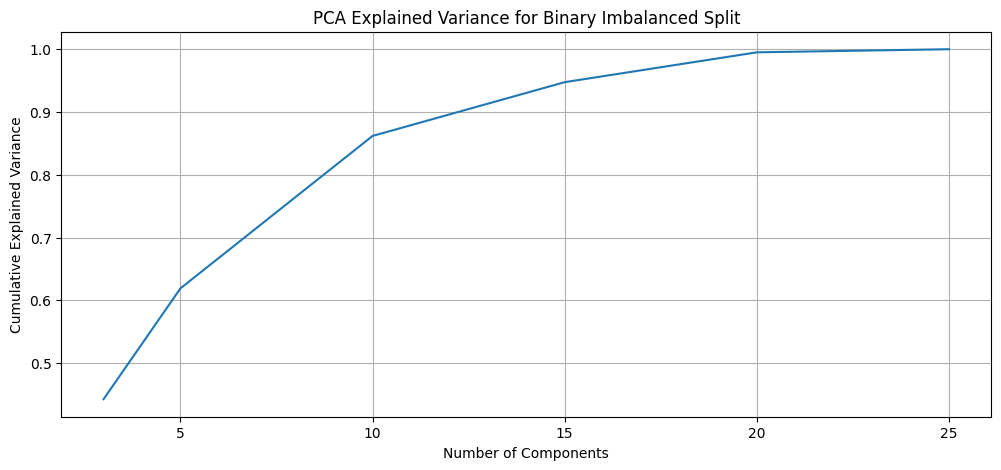

In [ ]:
### START CODE ###
plt.figure(figsize=(12,5))
plt.plot(num_components, variance)
plt.title("PCA Explained Variance for Binary Imbalanced Split")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
### END CODE ###

plt.show()